In [2]:
%matplotlib inline
from datavyz import ge

# Calibration of model parameters based on our recordings

### Running scans over grids for model parameters

In [31]:
from model import Model # the grid bounds are stored in the model file

import numpy as np
import os
from analyz.workflow.batch_run import GridSimulation, bash_script

## PASSIVE PROPS
GRID = {'gL': np.linspace(Model['gL_min'], Model['gL_max'], Model['N_gL']), #np.linspace(0.02, 2., N),
        'cm':np.linspace(Model['cm_min'], Model['cm_max'], Model['N_cm'])} #np.linspace(0.5, 2., N)}

np.savez(os.path.join('data', 'calib', 'passive-grid.npz'), **GRID)
# Making a bash script to run a scan on the above grid grid
sim = GridSimulation(GRID)
bs = bash_script('calib-passive')
bs.script = sim.build_script('python passive_props.py calib',
                             base_script=bs.script, simultaneous_runs=8)
bs.write(folder='bash')

## EXTRA-STIMULATION & NMDA PROPS
GRID = {'tauDecayNMDA': np.linspace(Model['tauDecayNMDA_min'], Model['tauDecayNMDA_max'], Model['N_tauDecayNMDA']),
        'Nsyn1':np.linspace(Model['Nsyn1_min'], Model['Nsyn1_max'], Model['N_Nsyn1'], dtype=int),
        'Nsyn2':np.linspace(Model['Nsyn2_min'], Model['Nsyn2_max'], Model['N_Nsyn2'], dtype=int),
        'Tnsyn20Hz':np.linspace(Model['Tnsyn20Hz_min'],Model['Tnsyn20Hz_max'],Model['N_Tnsyn20Hz']),
        'Tnsyn3Hz':np.linspace(Model['Tnsyn3Hz_min'],Model['Tnsyn3Hz_max'],Model['N_Tnsyn3Hz'])}

np.savez(os.path.join('data', 'calib', 'chelated-zinc-calib-grid.npz'), **GRID)
# Making a bash script to run a scan on the above grid grid
sim = GridSimulation(GRID)
bs = bash_script('calib-chelated-zinc')
bs.script = sim.build_script('python calibration_runs.py chelated-zinc-calib',
                             base_script=bs.script, simultaneous_runs=3*8)
bs.write(folder='./bash/')

## ZINC-MODULATION PROPS
GRID = {'alphaZn':np.linspace(Model['alphaZn_min'], Model['alphaZn_max'], Model['N_alphaZn']),
        'tauRiseZn':np.linspace(Model['tauRiseZn_min'],Model['tauRiseZn_max'], Model['N_tauRiseZn']),
        'tauDecayZn':np.linspace(Model['tauDecayZn_min'], Model['tauDecayZn_max'], Model['N_tauDecayZn']),
        'Deltax0':np.linspace(Model['Deltax0_min'], Model['Deltax0_max'], Model['N_Deltax0']),
        'deltax':np.linspace(Model['deltax_min'], Model['deltax_max'], Model['N_deltax'])}

np.savez(os.path.join('data', 'calib', 'free-zinc-calib-grid.npz'), **GRID)

# Making a bash script to run a scan on the above grid grid
sim = GridSimulation(GRID) # os.path.join('data', 'calib', 'passive-grid.npz'))
bs = bash_script('calib-free-zinc')
bs.script = sim.build_script('python calibration_runs.py free-zinc-calib',
                             base_script=bs.script, simultaneous_runs=3*8)
bs.write(folder='./bash/')

## FULL-CALIB SCRIPT
full_calib = """#!/bin/bash
# bash bash/calib-passive.sh # RUN
# python passive_props.py calib-analysis # ANALYSIS
# bash bash/calib-chelated-zinc.sh # RUN
# python calibration_runs.py chelated-zinc-calib-analysis # ANALYSIS
bash bash/calib-free-zinc.sh # RUN
python calibration_runs.py free-zinc-calib-analysis # ANALYSIS
# a few more configs
bash bash/calib-free-zinc-1.sh # RUN
python calibration_runs.py chelated-zinc-calib-analysis data/calib/free-zinc-calib-grid-1.npz # ANALYSIS
bash bash/calib-free-zinc-2.sh # RUN
python calibration_runs.py chelated-zinc-calib-analysis data/calib/free-zinc-calib-grid-2.npz # ANALYSIS
bash bash/calib-free-zinc-3.sh # RUN
python calibration_runs.py chelated-zinc-calib-analysis data/calib/free-zinc-calib-grid-3.npz # ANALYSIS
"""
with open(os.path.join('bash', 'full-calib.sh'), 'w') as bs:
    bs.write(full_calib)


## a few grid tests

In [28]:
Model1 = {
   'alphaZn_min':0.15, 'alphaZn_max':0.5, 'N_alphaZn':7,
    'tauRiseZn_min':5, 'tauRiseZn_max':50, 'N_tauRiseZn':6,
    'tauDecayZn_min':50, 'tauDecayZn_max':680, 'N_tauDecayZn':8,
    'Deltax0_min':0.3, 'Deltax0_max':0.9, 'N_Deltax0':7,
    'deltax_min':0.05, 'deltax_max':0.425, 'N_deltax':7}

Model= Model1
GRID = {'alphaZn':np.linspace(Model['alphaZn_min'], Model['alphaZn_max'], Model['N_alphaZn']),
        'tauRiseZn':np.linspace(Model['tauRiseZn_min'],Model['tauRiseZn_max'], Model['N_tauRiseZn']),
        'tauDecayZn':np.linspace(Model['tauDecayZn_min'], Model['tauDecayZn_max'], Model['N_tauDecayZn']),
        'Deltax0':np.linspace(Model['Deltax0_min'], Model['Deltax0_max'], Model['N_Deltax0']),
        'deltax':np.linspace(Model['deltax_min'], Model['deltax_max'], Model['N_deltax'])}
np.savez(os.path.join('data', 'calib', 'free-zinc-calib-grid-1.npz'), **GRID)
# Making a bash script to run a scan on the above grid grid
sim = GridSimulation(GRID)
bs = bash_script('calib-free-zinc-1')
bs.script = sim.build_script('python calibration_runs.py free-zinc-calib data/calib/chelated-zinc-calib-grid-1.npz',
                             base_script=bs.script, simultaneous_runs=3*8)
bs.write(folder='./bash/')

In [29]:
Model2 = {
    'alphaZn_min':0.1, 'alphaZn_max':0.7, 'N_alphaZn':7,
    'tauRiseZn_min':5, 'tauRiseZn_max':50, 'N_tauRiseZn':7,
    'tauDecayZn_min':50, 'tauDecayZn_max':1000, 'N_tauDecayZn':7,
    'Deltax0_min':0.2, 'Deltax0_max':1., 'N_Deltax0':7,
    'deltax_min':0.01, 'deltax_max':0.2, 'N_deltax':7}
Model= Model2
GRID = {'alphaZn':np.linspace(Model['alphaZn_min'], Model['alphaZn_max'], Model['N_alphaZn']),
        'tauRiseZn':np.linspace(Model['tauRiseZn_min'],Model['tauRiseZn_max'], Model['N_tauRiseZn']),
        'tauDecayZn':np.linspace(Model['tauDecayZn_min'], Model['tauDecayZn_max'], Model['N_tauDecayZn']),
        'Deltax0':np.linspace(Model['Deltax0_min'], Model['Deltax0_max'], Model['N_Deltax0']),
        'deltax':np.linspace(Model['deltax_min'], Model['deltax_max'], Model['N_deltax'])}
np.savez(os.path.join('data', 'calib', 'free-zinc-calib-grid-2.npz'), **GRID)
# Making a bash script to run a scan on the above grid grid
sim = GridSimulation(GRID)
bs = bash_script('calib-free-zinc-2')
bs.script = sim.build_script('python calibration_runs.py free-zinc-calib data/calib/chelated-zinc-calib-grid-2.npz',
                             base_script=bs.script, simultaneous_runs=3*8)
bs.write(folder='./bash/')


In [30]:
Model3 = {
    'alphaZn_min':0.2, 'alphaZn_max':0.7, 'N_alphaZn':6,
    'tauRiseZn_min':1, 'tauRiseZn_max':100, 'N_tauRiseZn':6,
    'tauDecayZn_min':100, 'tauDecayZn_max':1000, 'N_tauDecayZn':6,
    'Deltax0_min':0.2, 'Deltax0_max':1., 'N_Deltax0':6,
    'deltax_min':0.01, 'deltax_max':0.2, 'N_deltax':6}

Model= Model3
GRID = {'alphaZn':np.linspace(Model['alphaZn_min'], Model['alphaZn_max'], Model['N_alphaZn']),
        'tauRiseZn':np.linspace(Model['tauRiseZn_min'],Model['tauRiseZn_max'], Model['N_tauRiseZn']),
        'tauDecayZn':np.linspace(Model['tauDecayZn_min'], Model['tauDecayZn_max'], Model['N_tauDecayZn']),
        'Deltax0':np.linspace(Model['Deltax0_min'], Model['Deltax0_max'], Model['N_Deltax0']),
        'deltax':np.linspace(Model['deltax_min'], Model['deltax_max'], Model['N_deltax'])}
np.savez(os.path.join('data', 'calib', 'free-zinc-calib-grid-3.npz'), **GRID)
# Making a bash script to run a scan on the above grid grid
sim = GridSimulation(GRID)
bs = bash_script('calib-free-zinc-3')
bs.script = sim.build_script('python calibration_runs.py free-zinc-calib data/calib/chelated-zinc-calib-grid-3.npz',
                             base_script=bs.script, simultaneous_runs=3*8)
bs.write(folder='./bash/')

## Calibration of AMPA-to-NMDA ratio

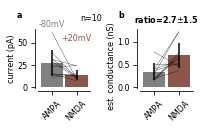

In [2]:
import numpy as np
from data.exp_datasets import SYN_CONDUCTANCE_MEASUREMENTS
fig, AX = ge.figure(axes=(2,1), figsize=(.9,1.3), wspace=1.5, top=1.2)
for v1, v2 in zip(SYN_CONDUCTANCE_MEASUREMENTS['ampa'], SYN_CONDUCTANCE_MEASUREMENTS['nmda']):
    AX[0].plot([0,1], [v1, v2], 'k-', lw=0.3)
    AX[1].plot([0,1], [v1/80, v2/20], 'k-', lw=0.3)
ge.bar(np.array([np.mean(SYN_CONDUCTANCE_MEASUREMENTS['ampa']),
                 np.mean(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])]),
       sy=np.array([np.std(SYN_CONDUCTANCE_MEASUREMENTS['ampa']),
                    np.std(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])]),
       COLORS=[ge.grey, ge.brown],
       ax=AX[0],
       axes_args=dict(ylabel='current (pA)', xticks=[0, 1], xticks_labels=['AMPA', 'NMDA'], xticks_rotation=45))
for i, v, val in zip(range(2), ['-80', '+20'], [65, 50]):
    ge.annotate(AX[0],'%smV'%v,(i,val),xycoords='data', ha='center', color=[ge.grey, ge.brown][i])

ge.bar(np.array([np.mean(SYN_CONDUCTANCE_MEASUREMENTS['ampa'])/80.,
                 np.mean(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])/20.]),
       sy=np.array([np.std(SYN_CONDUCTANCE_MEASUREMENTS['ampa'])/80.,
                    np.std(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])/20.]),
       COLORS=[ge.grey, ge.brown],
       ax=AX[1],
       axes_args=dict(ylabel='est. conductance (nS)      ', xticks=[0, 1], xticks_labels=['AMPA', 'NMDA'], xticks_rotation=45))

RATIOS = np.array(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])/np.array(SYN_CONDUCTANCE_MEASUREMENTS['ampa'])*80/20
ge.annotate(AX[0], 'n=%i' % len(RATIOS), (.8,1.11))
ge.title(AX[1], 'ratio=%.1f$\pm$%.1f' % (np.mean(RATIOS), np.std(RATIOS)), bold=True)
for l, ax in zip(['a', 'b'], AX):
    ge.top_left_letter(ax, l, loc=(-.3,1.15))
ge.savefig(fig, 'figures/ampa-nmda-ratio.png')       

## Calibrating Passive properties

### Fitting the somatic response in experimental data to estimate passive properties

In [130]:
from data.exp_datasets import *
from data.Import import LoadICData
from datavyz import gen

import sys, os
sys.path.append(os.path.join(os.path.expanduser('~'), 'work', 'cortical-physio-icm')) # append CPI to y
from electrophy.intracellular.passive_props import perform_ICcharact

def fit_passive_props(data, ax=None, with_plot=False):

    cond = (data['t']>600)
    t, v = data['t'][cond]-data['t'][cond][0], data['recordings'][data['Vrec_key']].mean(axis=0)[cond]
    if with_plot:
        return perform_ICcharact(1e-3*t, 1e-3*v,
                                 t0=IC_t0s[i]*1e-3, t1=(IC_t0s[i]+IC_dts[i])*1e-3,
                                 Istep=-30e-12, ax=ax, with_plot=True, ge=gen)
    else:
        return perform_ICcharact(1e-3*t, 1e-3*v, t0=IC_t0s[i]*1e-3, t1=(IC_t0s[i]+IC_dts[i])*1e-3,
                                   Istep=-30e-12, with_plot=False)

RMS, CMS = [], []
for i in range(len(IC_STEPS_DATASET)):
    data = LoadICData(i)
    Rm, Cm = fit_passive_props(data)
    RMS.append(Rm)
    CMS.append(Cm)

expRm = np.array(RMS).mean()
expCm = np.array(CMS).mean()
print('Rm=%.2f+/-%.2f MOhm,\nCm=%.2f+/-%.2f pF' % (1e-6*np.array(RMS).mean(),
                                                   1e-6*np.array(RMS).std(),
                                                   1e12*np.array(CMS).mean(),
                                                   1e12*np.array(CMS).std()))


WARNING    /home/yann/work/cortical-physio-icm/electrophy/intracellular/passive_props.py:70: RuntimeWarning: invalid value encountered in multiply
  return Vbsl+step(t, t0, t1)*VbslShift*(1-np.exp(-(t-t0)/Tau))+\
 [py.warnings]


Rm=137.53+/-50.16 MOhm,
Cm=211.87+/-45.89 pF


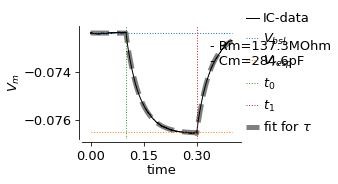

In [36]:
fit_passive_props(LoadICData(10), with_plot=True);

### Minimizing model parameters with respect to data

In [42]:
from data.exp_datasets import *
from data.Import import LoadICData
from datavyz import gen

import sys, os
sys.path.append(os.path.join(os.path.expanduser('~'), 'work', 'cortical-physio-icm')) # append CPI to y
from electrophy.intracellular.passive_props import perform_ICcharact

def fit_passive_props(data, ax=None, with_plot=False):

    cond = (data['t']>600)
    t, v = data['t'][cond]-data['t'][cond][0], data['recordings'][data['Vrec_key']].mean(axis=0)[cond]
    if with_plot:
        return perform_ICcharact(1e-3*t, 1e-3*v,
                                 t0=IC_t0s[i]*1e-3, t1=(IC_t0s[i]+IC_dts[i])*1e-3,
                                 Istep=-30e-12, ax=ax, with_plot=True, ge=gen)
    else:
        return perform_ICcharact(1e-3*t, 1e-3*v, t0=IC_t0s[i]*1e-3, t1=(IC_t0s[i]+IC_dts[i])*1e-3,
                                   Istep=-30e-12, with_plot=False)

RMS, CMS = [], []
for i in range(len(IC_STEPS_DATASET)):
    data = LoadICData(i)
    Rm, Cm = fit_passive_props(data)
    RMS.append(Rm)
    CMS.append(Cm)

expRm = np.array(RMS).mean()
expCm = np.array(CMS).mean()
print('Rm=%.2f+/-%.2f MOhm,\nCm=%.2f+/-%.2f pF' % (1e-6*np.array(RMS).mean(),
                                                   1e-6*np.array(RMS).std(),
                                                   1e12*np.array(CMS).mean(),
                                                   1e12*np.array(CMS).std()))

Rm=137.53+/-50.16 MOhm,
Cm=211.87+/-45.89 pF


0.2931034482758621 0.9137931034482758 100.0


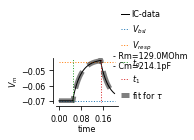

In [43]:
from analyz.IO.npz import load_dict
import sys, os
sys.path.append(os.path.join(os.path.expanduser('~'), 'work', 'cortical-physio-icm')) # append CPI to y
from electrophy.intracellular.passive_props import perform_ICcharact

sim = GridSimulation(os.path.join('data', 'calib', 'passive-grid.npz'))
sim_results = {'Rm':np.zeros(sim.N), 'Cm':np.zeros(sim.N),
               'gL':np.zeros(sim.N), 'cm':np.zeros(sim.N),
               'residual':np.zeros(sim.N)}

# looping over simulations
for index in range(int(sim.N)):
    output = load_dict(os.path.join('data', 'calib', sim.params_filename(index)+'.npz'))
    Rm, Cm = perform_ICcharact(1e-3*output['t'],
                               1e-3*output['Vm_soma'],
                               t0=50e-3, t1=150e-3)
    sim_results['Rm'][index], sim_results['Cm'][index] = Rm, Cm
    D = {}
    sim.update_dict_from_GRID_and_index(index, D)
    sim_results['gL'][index], sim_results['cm'][index] = D['gL'], D['cm']
    sim_results['residual'][index] = (1+(Rm-expRm)**2/expRm**2)*(1+(Cm-expCm)**2/expCm**2)

# perform minimization
ibest = np.argmin(sim_results['residual'])

# show output
output = load_dict(os.path.join('data', 'calib', sim.params_filename(ibest)+'.npz'))
fig, ax, modelRm, modelCm = perform_ICcharact(1e-3*output['t'], 1e-3*output['Vm_soma'],
                                              t0=50e-3, t1=150e-3, with_plot=True, ge=ge)

# save results as default passive props
from model import Model
sim.update_dict_from_GRID_and_index(ibest, Model) # update Model parameters
print(Model['gL'], Model['cm'], Model['Ri'])
np.savez(os.path.join('data','passive-props-IC.npz'), **{'gL':Model['gL'], 'cm':Model['cm'], 'filename':os.path.join('data', 'calib', sim.params_filename(ibest)+'.npz')})

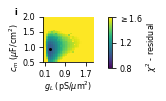

In [44]:
fig11, ax, acb = ge.twoD_plot(sim_results['gL'], sim_results['cm'],
                             sim_results['residual'],
                             vmin=0.8, vmax=1.6, colormap=ge.viridis,
                             bar_legend_args={'label':r'$\chi^2$ - residual    ',
                                              'ticks':[0.8, 1.2, 1.6]},
                             axes_args=dict(xlim_enhancement=0., ylim_enhancement=0., tck_outward=0,
                                            xlabel='$g_L$ (pS/$\mu$m$^2$)',
                                            xticks=[0.1, 0.9, 1.7],
                                            ylabel='$c_m$ ($\mu$F/cm$^2$)       '),
                             aspect='auto');
ge.scatter([Model['gL']], [Model['cm']], ax=ax, ms=2, no_set=True)
acb.set_ticklabels(['0.8', '1.2', '$\geq$1.6'])
ge.top_left_letter(ax, 'i', loc=(-.5,1.))

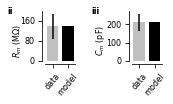

In [45]:
%matplotlib inline
from datavyz import ge
fig12, AX = ge.figure(axes=(2,1), figsize=(0.6,1.1), wspace=3.)

ge.bar([1e-6*np.array(RMS).mean()], sy=[1e-6*np.array(RMS).std()], width=0.75, ax=AX[0], no_set=True)
ge.bar(np.array([1e-6*np.array(RMS).mean()]), width=0.75, bins=[1], ax=AX[0], color='k', no_set=True)
ge.set_plot(AX[0], ylabel='$R_m$ (M$\Omega$)    ', ylabelpad=-4, xticks=[0,1],
            xticks_labels=['data','model'], xticks_rotation=50)

ge.bar([1e12*np.array(CMS).mean()], sy=[1e12*np.array(CMS).std()], width=0.75, ax=AX[1], no_set=True)
ge.bar(np.array([1e12*np.array(CMS).mean()]), width=0.75, bins=[1], ax=AX[1], color='k', no_set=True)
ge.set_plot(AX[1], ylabel='$C_m$ (pF)    ', ylabelpad=-1, xticks=[0,1],
            xticks_labels=['data','model'], xticks_rotation=50)
for l, ax in zip(['ii', 'iii'], AX):
    ge.top_left_letter(ax, l, loc=(-1.1,.9))


/home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


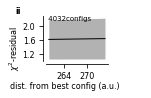

In [9]:
from analyz.IO.npz import load_dict
best = load_dict('data/best_chelatedZn_config.npz')
sim = GridSimulation(os.path.join('data', 'calib', 'chelated-zinc-calib-grid.npz'))
D = {}
norm = {}
for k in ['tauDecayNMDA', 'Nsyn1', 'Nsyn2', 'Tnsyn20Hz', 'Tnsyn3Hz']:
    norm[k]=(sim.GRID[k][-1]-sim.GRID[k][0])
    
def distance_from_best_config(best, new):
    distance = 0
    for k in ['tauDecayNMDA', 'Nsyn1', 'Nsyn2', 'Tnsyn20Hz', 'Tnsyn3Hz']:
        # distance += np.sqrt((best[k]-new[k])**2/best[k]**2)
        distance += (best[k]-new[k])**2/norm[k]**2
    return distance

Residuals = np.load(os.path.join('data', 'calib', 'chelatedZn-residuals.npy'))
Distance = np.zeros(sim.N)
for i in np.arange(int(sim.N)):
    sim.update_dict_from_GRID_and_index(i, D)
    Distance[i] = distance_from_best_config(best, D)

bins = np.linspace(0, Distance.max(), 20)
ibins = np.digitize(Distance, bins=bins, right=True)
d, r, sr = [], [], []
for i, b in enumerate(bins[:-1]):
    d.append(.5*(bins[i]+bins[i+1]))
    r.append(np.mean(Residuals[ibins==i]))
    sr.append(np.std(Residuals[ibins==i]))

fig22, ax = ge.plot(d, r, sy=np.array(sr),
        axes_args=dict(ylabel='$\chi^2$-residual        ', num_yticks=4,
                       xlabel='dist. from best config (a.u.)          '))
ge.annotate(ax, ' %iconfigs' % sim.N, (0., 1.), size='small', va='top')
ge.top_left_letter(ax, 'ii', loc=(-0.4,1.))


### Voltage-clamp data

In [ ]:
#### Loading experimental data and saving reduced datasets

0.01
0.01


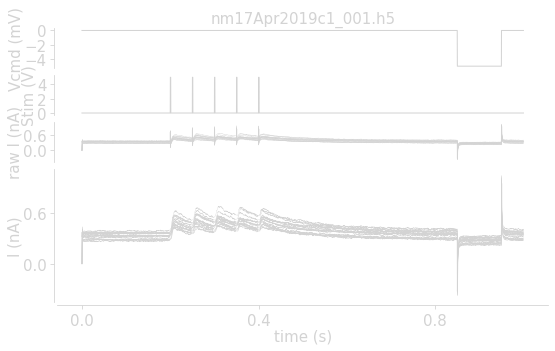

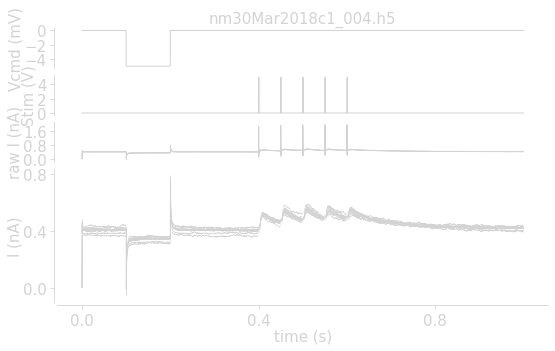

In [53]:
from data.Import import LoadVCData

def plot_protocol(D, tzoom=[0, np.inf]):
    fig, AX = ge.figure(axes_extents=[[[3,1]] for i in range(3)]+[[[3,3]]], hspace=0.3, figsize=(.6,.2))
    tcond = (D['t']>=tzoom[0]) & (D['t']<tzoom[1])
    ge.title(AX[0], D['filename'].split(os.path.sep)[-1])
    ge.plot(1e-3*D['t'][tcond], D['stimulations'][D['Vcmd_key']][tcond],
            ax=AX[0], axes_args={'spines':['left'], 'ylabel':'Vcmd (mV)'})
    ge.plot(1e-3*D['t'][tcond], D['stimulations'][D['stim_key']][tcond],
            ax=AX[1], axes_args={'spines':['left'], 'ylabel':'Stim (V)'})
    for i in range(D['recordings'][D['Irec_key']].shape[0]):
        AX[2].plot(1e-3*D['t'][tcond], D['recordings'][D['Irec_key']][i,tcond],
                   color='lightgray', lw=0.3) 
    ge.plot(1e-3*D['t'][tcond], D['recordings'][D['Irec_key']].mean(axis=0)[tcond],
            ax=AX[2], axes_args={'spines':['left'], 'ylabel':'raw I (nA)'})
    # now blanking the stimulus period
    for i in range(D['recordings'][D['Irec_key']].shape[0]):
        AX[3].plot(1e-3*D['t'][tcond], D['recordings']['Irecording_clean'][i,tcond],
                   color='lightgray', lw=0.3) 
    ge.plot(1e-3*D['t'][tcond], D['recordings']['Irecording_clean'].mean(axis=0)[tcond],
            ax=AX[3], axes_args={'xlabel':'time (s)', 'ylabel':'I (nA)'})

data_ctrl = LoadVCData('20Hz_protocol', iexp=4, condition='Tricine')
plot_protocol(data_ctrl)
data_ctrl = LoadVCData('20Hz_protocol', iexp=3, condition='Tricine')
plot_protocol(data_ctrl)

In [149]:
from data.Import import LoadVCData
from data.exp_datasets import VC_STEPS_DATASET
import numpy as np
FDATA = {}

def compute_norm_trace(data,
                       window_for_peak=20, # ms
                       pre_window = 150, # ms
                       t0=400,
                       width=700,
                       with_all=False):

    tcond = (data['t']>t0-pre_window) & (data['t']<t0+width)
    baseline_cond = (data['t']>t0-pre_window) & (data['t']<t0)
    baseline = data['recordings']['Irecording_clean'].mean(axis=0)[baseline_cond].mean()

    trace = data['recordings']['Irecording_clean'].mean(axis=0)[tcond]-baseline
    stim = data['stimulations'][data['stim_key']][tcond]
    stim_events = np.argwhere((stim[:-1]<2) & (stim[1:]>=2)).flatten()
    peak_cond = (data['t'][tcond]>=t0) & (data['t'][tcond]<=t0+window_for_peak)

    norm_trace = trace/np.max(trace[peak_cond])

    if with_all:
        return data['t'][tcond], stim_events, norm_trace, np.max(trace[peak_cond])
    else:
        return norm_trace

for cond, width in zip(['3Hz_protocol', '20Hz_protocol'], [10000, 600]):
    norm_trace_ctrl, norm_trace_test = [], []
    scale_ctrl, scale_test = [], []
    for i, cell in enumerate(VC_STEPS_DATASET[cond]):
        if len(cell['Control'][0].split('17Apr2019'))>1:
            t0=200
        else:
            t0=400
        data_ctrl = LoadVCData(cond, iexp=i, condition='Control')
        t, se, n_trace, scale = compute_norm_trace(data_ctrl,
                                            window_for_peak=20,
                                            pre_window = 150,
                                            t0=t0, width=width, with_all=True)
        norm_trace_ctrl.append(n_trace)
        scale_ctrl.append(scale)
        data_test = LoadVCData(cond, iexp=i, condition='Tricine')
        t, se, n_trace, scale = compute_norm_trace(data_test,
                                            window_for_peak=20,
                                            pre_window = 150,
                                            t0=t0, width=width, with_all=True)
        norm_trace_test.append(n_trace)
        scale_test.append(scale)

    FDATA[cond] = {'norm_trace_freeZn':np.array(norm_trace_ctrl),
                   'norm_trace_chelatedZn':np.array(norm_trace_test),
                   't':t,
                   'se':se,
                   'scale_freeZn':np.array(scale_ctrl),
                   'scale_chelatedZn':np.array(scale_test)}
    
np.savez('data/full_data_for_calibration.npz', **FDATA)



OSError: Unable to open file (unable to open file: name = '/media/yann/DATADRIVE1/DATA/Data_Nunzio/2019/September/nm18Sep2019c1/nm18Sep2019c1_000.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [61]:
from analyz.IO.npz import load_dict

FDATA = load_dict('data/full_data_for_calibration.npz')

calibration_constraints = {}
for cond in ['20Hz_protocol', '3Hz_protocol']:
    
    ## exp
    DT0 = FDATA[cond]['t'][FDATA[cond]['se'][0]]-FDATA[cond]['t'][0]
    DTfull = FDATA[cond]['t'][-1]-FDATA[cond]['t'][0]
    new_t = FDATA[cond]['t'][::10][:-1]-FDATA[cond]['t'][0]
    calibration_constraints['DT0_%s' % cond] = DT0
    calibration_constraints['DTfull_%s' % cond] = FDATA[cond]['t'][-1]-FDATA[cond]['t'][0]
    calibration_constraints['t_%s' % cond] = new_t

    # # tricine cond
    te0 = FDATA[cond]['norm_trace_chelatedZn'].mean(axis=0)*\
        1e3*FDATA[cond]['scale_chelatedZn'].mean()
    trace_exp = te0[::10][:-1] # subsampling at 1kHz
    calibration_constraints['Iexp_chelatedZn_%s' % cond] = trace_exp
    
    # # control cond
    te0 = FDATA[cond]['norm_trace_freeZn'].mean(axis=0)*1e3*FDATA[cond]['scale_freeZn'].mean()
    trace_exp = te0[::10][:-1] # subsampling at 1kHz
    calibration_constraints['Iexp_freeZn_%s' % cond] = trace_exp
    
np.savez('data/exp_data_for_calibration.npz', **calibration_constraints)


In [325]:
## Importing electrophy/intracellular module
import sys
sys.path.append(os.path.join(os.path.expanduser('~'), 'work', 'cortical-physio-icm')) # append CPI to your path to be able to import
from electrophy.intracellular.passive_props import extract_VCcharact, from_VCcharact_to_membrane_parameters

In [336]:
from scipy.optimize import minimize
from data.Import import LoadVCData

WITH_PLOT = False # turn to True to see all recordings
PROPERTIES = {} # This will store the analysis results
def add_to(PROPERTIES, key, dtype=float):
    PROPERTIES[key] = {}
    for k in VC_STEPS_DATASET:
        PROPERTIES[key][k] = []
        for d in VC_STEPS_DATASET[k]:
            new_d = {}
            for kk in d:
                new_d[kk] = np.zeros(len(d[kk]), dtype=dtype)
            PROPERTIES[key][k].append(new_d)
# e.g use as: "add_to(PROPERTIES, 'Rm', dtype=float)"

add_to(PROPERTIES, 'Rm', dtype=float)
add_to(PROPERTIES, 'Cm', dtype=float)
add_to(PROPERTIES, 'Rs', dtype=float)

cond = '3Hz_protocol'

for prtcl in ['3Hz_protocol', '20Hz_protocol']:
    for i, cell in enumerate(VC_STEPS_DATASET[prtcl]):
        for cond in ['Control', 'Tricine']:
            data = LoadVCData(prtcl, iexp=i, condition=cond)

            t = data['t']
            tcond = (t>2) & (t<400)
            trace = data['recordings'][data['Irec_key']].mean(axis=0)
            if WITH_PLOT:
                fig, ax, IbslShift, IexpPeak, Tau = extract_VCcharact(t[tcond], trace[tcond],
                                                                      t0=100, t1=200,
                                                                      with_plot=True, ge=ge,
                                                title=data['filename'].split(os.path.sep)[-1])
            else:
                IbslShift, IexpPeak, Tau = extract_VCcharact(t[tcond], trace[tcond],
                                                             t0=100, t1=200,
                                                             with_plot=False)
                
            Rm, Cm, Rs = from_VCcharact_to_membrane_parameters(1e-9*IbslShift, 1e-9*IexpPeak, 1e-3*Tau)
            ge.annotate(ax, """
            - Rm=%.1fMOhm
            - Cm=%.1fpF
            - Rs=%.1fMOhm
            """ % (1e-6*Rm, 1e12*Cm, 1e-6*Rs), (.5,.6), size='small')
            PROPERTIES['Rm'][prtcl][i][cond][0] = Rm
            PROPERTIES['Cm'][prtcl][i][cond][0] = Cm
            PROPERTIES['Rs'][prtcl][i][cond][0] = Rs

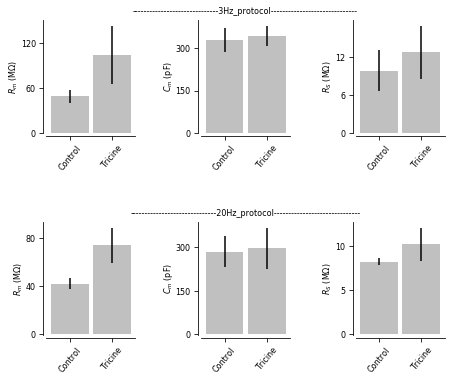

In [333]:
Rm, Cm, Rs = {}, {}, {}

fig, AX = gen.figure(axes=(3,2), figsize=(.7,1.), wspace=1.3, hspace=1.3)


for prtcl, axs in zip(['3Hz_protocol', '20Hz_protocol'], AX):
    
    for cond in ['Control', 'Tricine']:
        Rm[cond], Cm[cond], Rs[cond] = [], [], []
        
    for i, cell in enumerate(VC_STEPS_DATASET[prtcl]):
        for cond in ['Control', 'Tricine']:
            Rm[cond].append(PROPERTIES['Rm'][prtcl][i][cond][0])
            Cm[cond].append(PROPERTIES['Cm'][prtcl][i][cond][0])
            Rs[cond].append(PROPERTIES['Rs'][prtcl][i][cond][0])

    ge.bar([1e-6*np.array(Rm[cond]).mean() for cond in ['Control', 'Tricine']],
           sy=[1e-6*np.array(Rm[cond]).std() for cond in ['Control', 'Tricine']],
           axes_args=dict(xticks_labels=['Control', 'Tricine'], xticks=[0,1],
                          xticks_rotation=50, ylabel='$R_m$ (M$\Omega$)'),
           ax=axs[0])
    ge.bar([1e12*np.mean(Cm[cond]) for cond in ['Control', 'Tricine']],
           sy=[1e12*np.std(Cm[cond]) for cond in ['Control', 'Tricine']],
           axes_args=dict(xticks_labels=['Control', 'Tricine'], xticks=[0,1],
                          xticks_rotation=50, ylabel='$C_m$ (pF)'),
           ax=axs[1])
    ge.bar([1e-6*np.array(Rs[cond]).mean() for cond in ['Control', 'Tricine']],
           sy=[1e-6*np.array(Rs[cond]).std() for cond in ['Control', 'Tricine']],
           axes_args=dict(xticks_labels=['Control', 'Tricine'], xticks=[0,1],
                          xticks_rotation=50, ylabel='$R_S$ (M$\Omega$)'),
           ax=axs[2])
    ge.title(axs[1], 30*'-'+prtcl+30*'-')
    

In [334]:
# merging protocols
Rm, Cm, Rs = {}, {}, {}
for cond in ['Control', 'Tricine']:
    Rm[cond], Cm[cond], Rs[cond] = [], [], []
for prtcl in ['3Hz_protocol', '20Hz_protocol']:
    for i, cell in enumerate(VC_STEPS_DATASET[prtcl]):
        for cond in ['Control', 'Tricine']:
            Rm[cond].append(PROPERTIES['Rm'][prtcl][i][cond][0])
            Cm[cond].append(PROPERTIES['Cm'][prtcl][i][cond][0])
            Rs[cond].append(PROPERTIES['Rs'][prtcl][i][cond][0])

expRm = np.array(Rm['Control']).mean()
expCm = np.array(Cm['Control']).mean()
print('Rm=%.2f+/-%.2f MOhm,\nCm=%.2f+/-%.2f pF' % (1e-6*np.array(Rm['Control']).mean(),
                                                   1e-6*np.array(Rm['Control']).std(),
                                                   1e12*np.array(Cm['Control']).mean(),
                                                   1e12*np.array(Cm['Control']).std()))

Rm=45.89+/-8.15 MOhm,
Cm=311.89+/-52.40 pF


## Calibrating Zinc-NMDA properties on Extracellular stimulation data

In [5]:
import os
import numpy as np
from analyz.workflow.batch_run import slurm_script, bash_script, GridSimulation
from analyz.IO.npz import load_dict

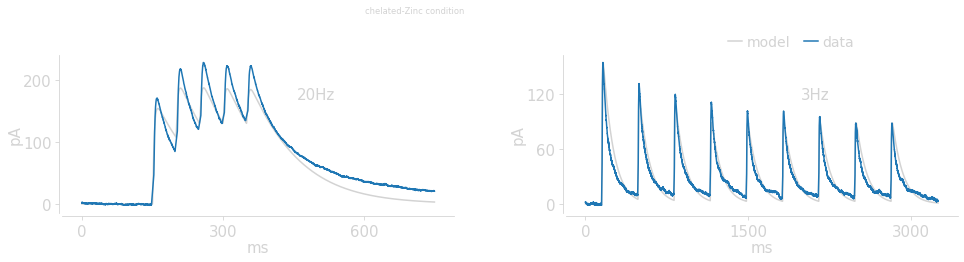

In [10]:
from datavyz import gedn as ge
from analyz.IO.npz import load_dict
fig, AX = ge.figure(axes=(2,1), figsize=(1.2,0.8), wspace=0.5, hspace=0)

calib_data = load_dict('data/exp_data_for_calibration.npz')
mdata = load_dict(load_dict('data/best_chelatedZn_config.npz')['filename'])

for cond, ax in zip(['20Hz_protocol', '3Hz_protocol'], AX):
    ## data
    tcond = (mdata['t']>(mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond])) &\
        (mdata['t']<mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond]+\
         calib_data['DTfull_%s' % cond])
    
    trace_model = -1e3*(mdata['Ic'][tcond]-mdata['Ic'][tcond][0])
    trace_exp = calib_data['Iexp_chelatedZn_%s' % cond]
    
    ax.plot(calib_data['t_%s' % cond], trace_model, color=ge.default_color, label='model')
    ax.plot(calib_data['t_%s' % cond], trace_exp, color=ge.blue, label='data')

    ge.set_plot(ax, ylabel='pA', xlabel='ms')
    ge.annotate(ax, cond.split('_')[0], (.6, .7))
    
ge.legend(AX[1], size='small', loc=(0.4,1.), ncol=2)
fig.suptitle('chelated-Zinc condition', color=ge.default_color, size='small');

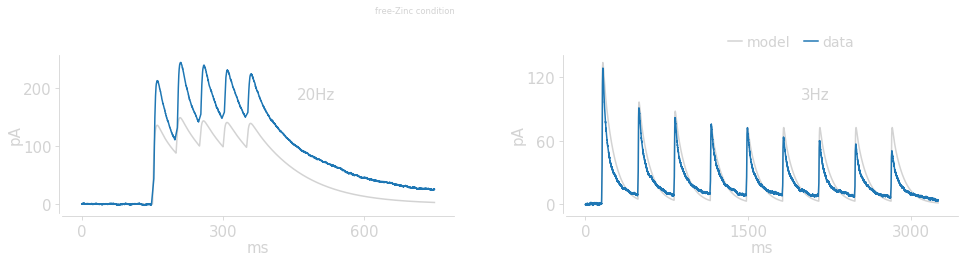

In [11]:
from datavyz import gedn as ge
from analyz.IO.npz import load_dict
fig, AX = ge.figure(axes=(2,1), figsize=(1.2,0.8),
                    wspace=0.5, hspace=0)

calib_data = load_dict('data/exp_data_for_calibration.npz')
mdata = load_dict(load_dict('data/best_freeZn_config.npz')['filename'])

for cond, ax in zip(['20Hz_protocol', '3Hz_protocol'], AX):
    ## data
    tcond = (mdata['t']>(mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond])) &\
        (mdata['t']<mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond]+\
         calib_data['DTfull_%s' % cond])
    
    trace_model = -1e3*(mdata['Ic'][tcond]-mdata['Ic'][tcond][0])
    trace_exp = calib_data['Iexp_freeZn_%s' % cond]
    
    ax.plot(calib_data['t_%s' % cond], trace_model, color=ge.default_color, label='model')
    ax.plot(calib_data['t_%s' % cond], trace_exp, color=ge.blue, label='data')

    ge.set_plot(ax, ylabel='pA', xlabel='ms')
    ge.annotate(ax, cond.split('_')[0], (.6, .7))
    
ge.legend(AX[1], size='small', loc=(0.4,1.), ncol=2)
fig.suptitle('free-Zinc condition', color=ge.default_color, size='small');

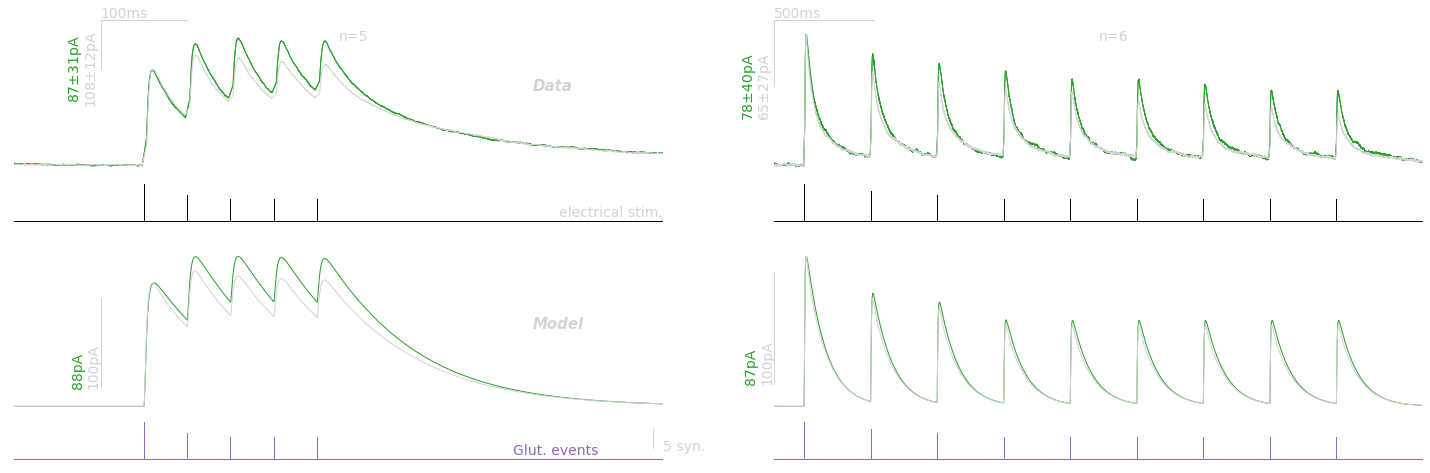

In [12]:
from analyz.IO.npz import load_dict

MDATA = {'free':load_dict(load_dict('data/best_freeZn_config.npz')['filename']),
         'chelated':load_dict(load_dict('data/best_chelatedZn_config.npz')['filename'])}
FDATA = load_dict('data/full_data_for_calibration.npz')

fig, AX = ge.figure(axes_extents=[[[1,7],[1,7]],
                                  [[1,2],[1,2]],
                                  [[1,1],[1,1]],
                                  [[1,7],[1,7]],
                                  [[1,2],[1,2]]],
                    figsize=(1.55,0.12),
                    wspace=0.3, hspace=0, right=0.)

for ax in AX[2]:
    ax.axis('off')
    
for cond, ax, ax1, ax2, ax3, I0, t0, DI, T in zip(['20Hz_protocol', '3Hz_protocol'],
                                                  AX[0], AX[1], AX[3], AX[4], [1.5, 1.1],
                                                  [100, 0], [0.5, 0.5], [100, 500]):

    ## exp
    ax.plot(FDATA[cond]['t'][0]+t0+np.zeros(2), [I0,I0-DI], lw=1, color=ge.default_color)
    ax.plot(FDATA[cond]['t'][0]+t0+np.arange(2)*T, [I0, I0], lw=1, color=ge.default_color)
    ge.annotate(ax, '%.0f$\pm$%.0fpA' % (1e3*FDATA[cond]['scale_freeZn'].mean()*DI,
                1e3*FDATA[cond]['scale_freeZn'].std()*DI),
                (FDATA[cond]['t'][0]+t0, I0-DI), xycoords='data', rotation=90,
                ha='right', va='center', size='small')
    ge.annotate(ax, '%.0f$\pm$%.0fpA\n' % (1e3*FDATA[cond]['scale_chelatedZn'].mean()*DI,
                1e3*FDATA[cond]['scale_chelatedZn'].std()*DI),
                (FDATA[cond]['t'][0]+t0, I0-DI), xycoords='data', rotation=90,
                ha='right', color=ge.green, va='center', size='small')
    ge.plot(FDATA[cond]['t'], FDATA[cond]['norm_trace_chelatedZn'].mean(axis=0),
            sy=0*FDATA[cond]['norm_trace_chelatedZn'].std(axis=0), ax=ax, color=ge.green)
    ge.plot(FDATA[cond]['t'], FDATA[cond]['norm_trace_chelatedZn'].mean(axis=0),
            sy=0*FDATA[cond]['norm_trace_chelatedZn'].std(axis=0), ax=ax, color=ge.green)
    ge.plot(FDATA[cond]['t'], FDATA[cond]['norm_trace_freeZn'].mean(axis=0),
            sy=0*FDATA[cond]['norm_trace_freeZn'].std(axis=0), ax=ax)
    ge.annotate(ax, 'n=%i' % len(FDATA[cond]['norm_trace_freeZn']), (.5,.8), size='small')
    ge.annotate(ax, '%ims' % T, (FDATA[cond]['t'][0]+t0, I0), xycoords='data', size='small')
    ge.set_plot(ax,[], xlim=[FDATA[cond]['t'][0], FDATA[cond]['t'][-1]])


    ## model
    DT0 = FDATA[cond]['t'][FDATA[cond]['se'][0]]-FDATA[cond]['t'][0]
    DTfull = FDATA[cond]['t'][-1]-FDATA[cond]['t'][0]

    tcond = (MDATA['free']['t']>(MDATA['free']['%s_tstart' % cond]-DT0)) &\
        (MDATA['free']['t']<(MDATA['free']['%s_tstart' % cond]-DT0+DTfull))

    trace_chelatedZn = -1e3*(MDATA['chelated']['Ic'][tcond]-MDATA['chelated']['Ic'][tcond][0])
    trace_freeZn = -1e3*(MDATA['free']['Ic'][tcond]-MDATA['free']['Ic'][tcond][0])
    
    # norm
    tarray, ta0, window_for_peak = MDATA['free']['t'][tcond], 150, 20
    peak_cond = (tarray>=ta0+tarray[0]) & (tarray<=ta0+window_for_peak+tarray[0])
    ax2.plot(tarray, trace_chelatedZn/np.max(trace_chelatedZn[peak_cond]), color=ge.green, lw=1)
    ax2.plot(tarray, trace_freeZn/np.max(trace_freeZn[peak_cond]), color=ge.default_color, lw=1)

    SCALE = 100 # pA
    YSCALE = SCALE/np.max(trace_freeZn[peak_cond]) # 100 pA
    ax2.plot(tarray[0]+t0+np.zeros(2), [.2*YSCALE, 1.2*YSCALE], lw=1, color=ge.default_color)
    ge.annotate(ax2, '%ipA' % SCALE, (tarray[0]+t0, .2*YSCALE),
                xycoords='data', rotation=90, ha='right', va='bottom', size='small')
    YSCALE2 = SCALE/np.max(trace_chelatedZn[peak_cond])*np.max(trace_freeZn[peak_cond]) # 100 pA
    ge.annotate(ax2, '%ipA\n' % int(YSCALE2), (tarray[0]+t0, .2*YSCALE),
                xycoords='data', rotation=90, ha='right', va='bottom', size='small',
                color=ge.green)

    ge.set_plot(ax2,[], xlim=[MDATA['free']['t'][tcond][0], MDATA['free']['t'][tcond][-1]])
    
    x, y = [MDATA['free']['t'][tcond][0]], [0]
    for e, n in zip(MDATA['free']['events'], MDATA['free']['Npicked']):
        x += [e,e,e]
        y += [0,n,0]
    x += [MDATA['free']['t'][tcond][-1]]
    y += [0]
    x, y = np.array(x), np.array(y)
    tcond = (x>=MDATA['free']['t'][tcond][0]) & (x<=MDATA['free']['t'][tcond][-1])
    ax1.plot(x[tcond], y[tcond], 'k-', lw=1)
    ax3.plot(x[tcond], y[tcond], lw=1, color=ge.purple)
    ge.set_plot(ax1,[], xlim=[x[tcond][0],x[tcond][-1]], ylim=[-1,np.max(MDATA['free']['Npicked'])+2])
    ge.set_plot(ax3,[], xlim=[x[tcond][0],x[tcond][-1]], ylim=[-1,np.max(MDATA['free']['Npicked'])+2])

ge.plot(AX[4][0].get_xlim()[1]*.99*np.ones(2), [3,8], ax=AX[4][0], no_set=True)
ge.annotate(AX[4][0], '5 syn.', (1.,0.2), size='small')
    
ge.annotate(AX[0][0], 'Data', (.8,.5), italic=True, bold=True)
ge.annotate(AX[3][0], 'Model', (.8,.5), italic=True, bold=True)
ge.annotate(AX[1][0], 'electrical stim.', (1.,.1), ha='right', size='small')
ge.annotate(AX[4][0], 'Glut. events', (.9,.1), ha='right', size='small', color=ge.purple)
#fig.savefig('figures/calibration.svg')    

INFO       Cache size for target "cython": 8784 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/yann/.cython/brian_extensions" directory. [brian2]


tauDecayNMDA_70.000000--Nsyn1_12--Nsyn2_8--Tnsyn20Hz_30.000000--Tnsyn3Hz_30.000000.npz not found
tauDecayNMDA_90.000000--Nsyn1_10--Nsyn2_6--Tnsyn20Hz_56.666667--Tnsyn3Hz_56.666667.npz not found
tauDecayNMDA_100.000000--Nsyn1_4--Nsyn2_2--Tnsyn20Hz_30.000000--Tnsyn3Hz_70.000000.npz not found
tauDecayNMDA_60.000000--Nsyn1_10--Nsyn2_6--Tnsyn20Hz_30.000000--Tnsyn3Hz_43.333333.npz not found
tauDecayNMDA_110.000000--Nsyn1_10--Nsyn2_6--Tnsyn20Hz_70.000000--Tnsyn3Hz_43.333333.npz not found
tauDecayNMDA_70.000000--Nsyn1_2--Nsyn2_12--Tnsyn20Hz_30.000000--Tnsyn3Hz_43.333333.npz not found
tauDecayNMDA_70.000000--Nsyn1_8--Nsyn2_2--Tnsyn20Hz_43.333333--Tnsyn3Hz_70.000000.npz not found
tauDecayNMDA_90.000000--Nsyn1_4--Nsyn2_10--Tnsyn20Hz_43.333333--Tnsyn3Hz_56.666667.npz not found
tauDecayNMDA_70.000000--Nsyn1_6--Nsyn2_4--Tnsyn20Hz_43.333333--Tnsyn3Hz_70.000000.npz not found
tauDecayNMDA_80.000000--Nsyn1_12--Nsyn2_2--Tnsyn20Hz_56.666667--Tnsyn3Hz_30.000000.npz not found
tauDecayNMDA_80.000000--Nsyn1_1

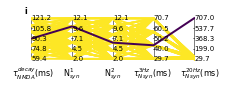

In [13]:
from calibration_runs import compute_chelated_residual, compute_free_residual
from analyz.IO.npz import load_dict
from datavyz import ge
from analyz.workflow.batch_run import GridSimulation
import os

calib_data = load_dict('data/exp_data_for_calibration.npz')
sim = GridSimulation(os.path.join('data', 'calib', 'chelated-zinc-calib-grid.npz'))
D, X, R, COLORS = {}, [], [], []

Nplot = 100
Residuals = np.ones(Nplot+1)*np.inf
for j, i in enumerate(np.random.choice(np.arange(int(sim.N)), Nplot)):
    Residuals[j] = np.log10(compute_chelated_residual(sim, i, calib_data))
    sim.update_dict_from_GRID_and_index(i, D)
    X.append([D[k] for k in sim.GRID])
D = load_dict('data/best_chelatedZn_config.npz')
X.append([D[k] for k in sim.GRID])
Residuals[-1] = compute_chelated_residual(sim, i, calib_data)

Colors = (Residuals-Residuals.min())/(Residuals.max()-Residuals.min())
fig21, ax = ge.parallel_plot(X,
                 SET_OF_LABELS=['  $\\tau_{NMDA}^{decay}$(ms)',
                                'N$_{syn}^{1}$', 'N$_{syn}^{2}$', 
                                '$\\tau_{Nsyn}^{3Hz}$(ms)  ', '    $\\tau_{Nsyn}^{20Hz}$(ms)'],
                             COLORS=[ge.viridis_r(c) for c in Colors],lw=2)
ge.top_left_letter(ax, 'i', loc=(-0.02,1.))

WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
 [py.warnings]


WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]


WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
 [py.warnings]


WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
 [py.warnings]


WARNING    /home/yann/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]


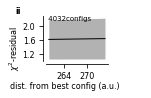

In [14]:
best = load_dict('data/best_chelatedZn_config.npz')
D = {}
norm = {}
for k in ['tauDecayNMDA', 'Nsyn1', 'Nsyn2', 'Tnsyn20Hz', 'Tnsyn3Hz']:
    norm[k]=(sim.GRID[k][-1]-sim.GRID[k][0])
    
def distance_from_best_config(best, new):
    distance = 0
    for k in ['tauDecayNMDA', 'Nsyn1', 'Nsyn2', 'Tnsyn20Hz', 'Tnsyn3Hz']:
        # distance += np.sqrt((best[k]-new[k])**2/best[k]**2)
        distance += (best[k]-new[k])**2/norm[k]**2
    return distance

Residuals = np.load(os.path.join('data', 'calib', 'chelatedZn-residuals.npy'))
Distance = np.zeros(sim.N)
for i in np.arange(int(sim.N)):
    sim.update_dict_from_GRID_and_index(i, D)
    Distance[i] = distance_from_best_config(best, D)

bins = np.linspace(0, Distance.max(), 20)
ibins = np.digitize(Distance, bins=bins, right=True)
d, r, sr = [], [], []
for i, b in enumerate(bins[:-1]):
    d.append(.5*(bins[i]+bins[i+1]))
    r.append(np.mean(Residuals[ibins==i]))
    sr.append(np.std(Residuals[ibins==i]))

fig22, ax = ge.plot(d, r, sy=np.array(sr),
        axes_args=dict(ylabel='$\chi^2$-residual        ', num_yticks=4,
                       xlabel='dist. from best config (a.u.)          '))
ge.annotate(ax, ' %iconfigs' % sim.N, (0., 1.), size='small', va='top')
ge.top_left_letter(ax, 'ii', loc=(-0.4,1.))


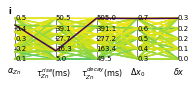

In [15]:
from calibration_runs import compute_free_residual
from analyz.IO.npz import load_dict
from datavyz import ge
calib_data = load_dict('data/exp_data_for_calibration.npz')
sim = GridSimulation(os.path.join('data', 'calib', 'free-zinc-calib-grid.npz'))
D, X, COLORS = {}, [], []

Nplot = 100
Residuals = np.ones(Nplot+1)*np.inf
for j, i in enumerate(np.random.choice(np.arange(int(sim.N)), Nplot)):
    Residuals[j] = np.log10(compute_free_residual(sim, i, calib_data))
    sim.update_dict_from_GRID_and_index(i, D)
    X.append([D[k] for k in sim.GRID])
D = load_dict('data/best_freeZn_config.npz')
X.append([D[k] for k in sim.GRID])
Residuals[-1] = compute_free_residual(sim, i, calib_data)

Colors = (Residuals-Residuals.min())/(Residuals.max()-Residuals.min())
fig31, ax = ge.parallel_plot(X,
                 SET_OF_LABELS=['$\\alpha_{Zn}$', '$\\tau_{Zn}^{rise}$(ms)  ','    $\\tau_{Zn}^{decay}$(ms)',
                                '$\Delta x_0$', '$\\delta x$'], lw=1.5, 
                 COLORS=[ge.viridis_r(c) for c in Colors])
ge.top_left_letter(ax, 'i', loc=(-0.02,1.))


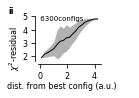

In [25]:
best = load_dict('data/best_freeZn_config.npz')
D = {}
norm = {}
for k in sim.GRID:
    norm[k]=(sim.GRID[k][-1]-sim.GRID[k][0])
    
def distance_from_best_config(best, new):
    distance = 0
    for k in sim.GRID:
        distance += (best[k]-new[k])**2/norm[k]**2
    return distance

Residuals = np.load(os.path.join('data', 'calib', 'freeZn-residuals.npy'))
Distance = np.zeros(sim.N)
for i in np.arange(int(sim.N)):
    sim.update_dict_from_GRID_and_index(i, D)
    Distance[i] = distance_from_best_config(best, D)

bins = np.linspace(0, Distance.max(), 20)
ibins = np.digitize(Distance, bins=bins, right=True)
d, r, sr = [], [], []
for i, b in enumerate(bins[:-1]):
    d.append(.5*(bins[i]+bins[i+1]))
    r.append(np.mean(Residuals[ibins==i]))
    sr.append(np.std(Residuals[ibins==i]))

fig32, ax = ge.plot(d, r, sy=np.array(sr),
        axes_args=dict(ylabel='$\chi^2$-residual        ', num_yticks=4,
                       xlabel='dist. from best config (a.u.)      '))
ge.annotate(ax, ' %iconfigs' % sim.N, (0., 1.), size='small', va='top')
ge.top_left_letter(ax, 'ii', loc=(-0.4,1.))


## Minimization figure

In [179]:
ge.multipanel_figure([[fig11, fig12],
                      [fig21, fig22],
                      [fig31, fig32]],
                     X=[[0, 165],
                        [-10, 200],
                        [-10, 200]],
                     X_LABELS=[[0, 165],
                        [0, 200],
                        [0, 200]],
                     Y=[[0, -5],
                        [95, 95],
                        [180, 180]],
                     LABELS=[['a', ''],['b', ''], ['c','']],
                     width='one-column-and-a-half',
                     height=98, grid=False,
                     fig_name='figures/optimization.png')

RUNNING: inkscape figures/optimization.svg --export-area-page --export-background="white" --export-type=png --export-filename="figures/optimization.png" --export-dpi=300


[ok] figure successfully exported as: figures/optimization.png
[ok] removed figures/optimization.svg


No handles with labels found to put in legend.


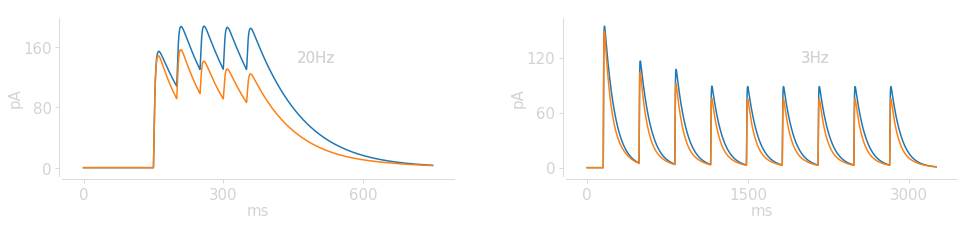

In [42]:
from datavyz import gedn as ge
from analyz.IO.npz import load_dict
fig, AX = ge.figure(axes=(2,1), figsize=(1.2,0.8),
                    wspace=0.5, hspace=0)

calib_data = load_dict('data/exp_data_for_calibration.npz')

for fn in ['chelatedZn', 'freeZn']:
    mdata = load_dict(os.path.join('data','calib', 'Best_%s.npz' % fn))
    for cond, ax in zip(['20Hz_protocol', '3Hz_protocol'], AX):
        ## data
        tcond = (mdata['t']>(mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond])) &\
            (mdata['t']<mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond]+\
             calib_data['DTfull_%s' % cond])

        trace_model = -1e3*(mdata['Ic'][tcond]-mdata['Ic'][tcond][0])

        ax.plot(calib_data['t_%s' % cond], trace_model)

        ge.set_plot(ax, ylabel='pA', xlabel='ms')
        ge.annotate(ax, cond.split('_')[0], (.6, .7))
    
ge.legend(AX[1], size='small', loc=(0.4,1.), ncol=2)

In [32]:
n = 0
for i in range(sim.N):
    if os.path.isfile(os.path.join('data', 'calib', sim.params_filename(i))):
        n+=1
print(os.path.join('data', 'calib', sim.params_filename(i)))
print(n, sim.N)

data/calib/alphaZn_0.700000--tauRiseZn_40.000000--tauDecayZn_500.000000--Deltax0_0.700000
0 2401


## Extracellular stimulation data: 3Hz and 20hz 

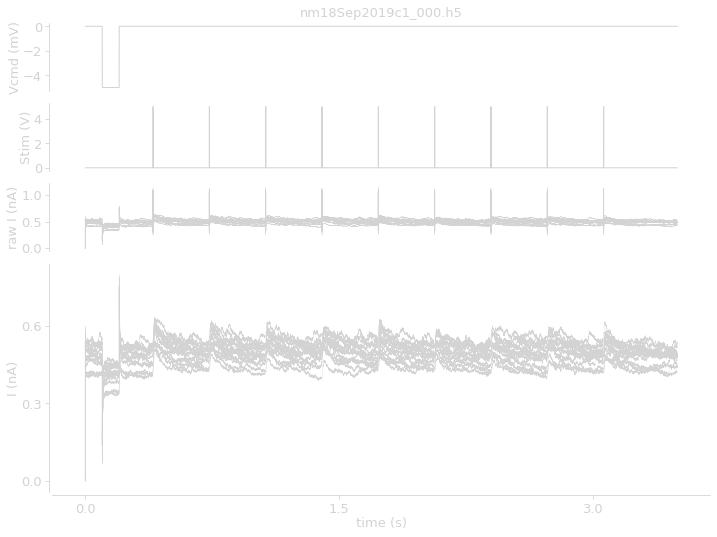

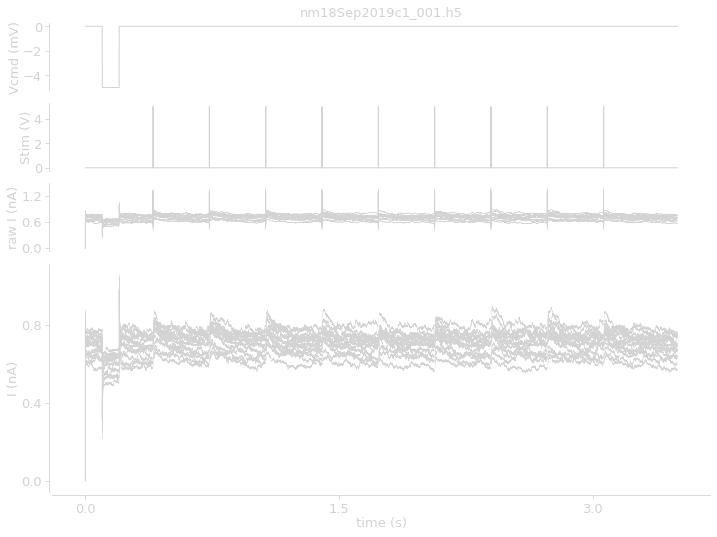

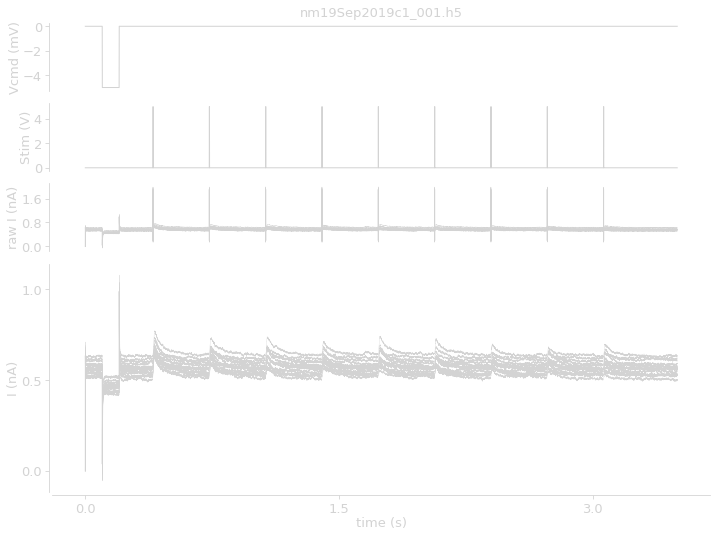

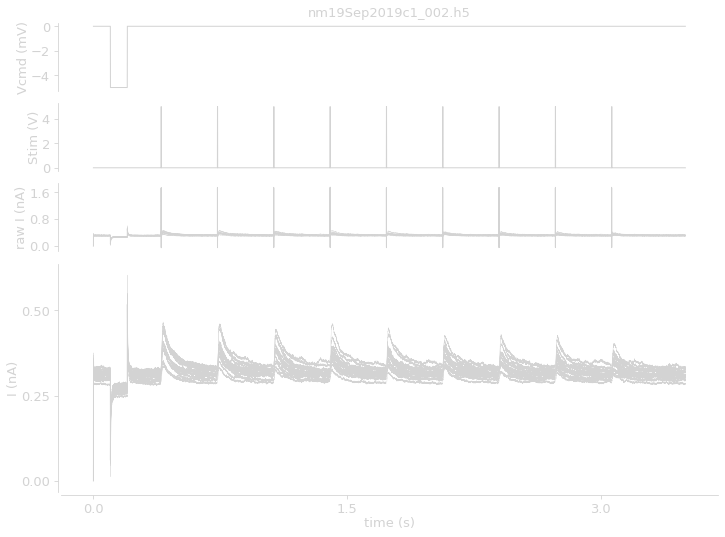

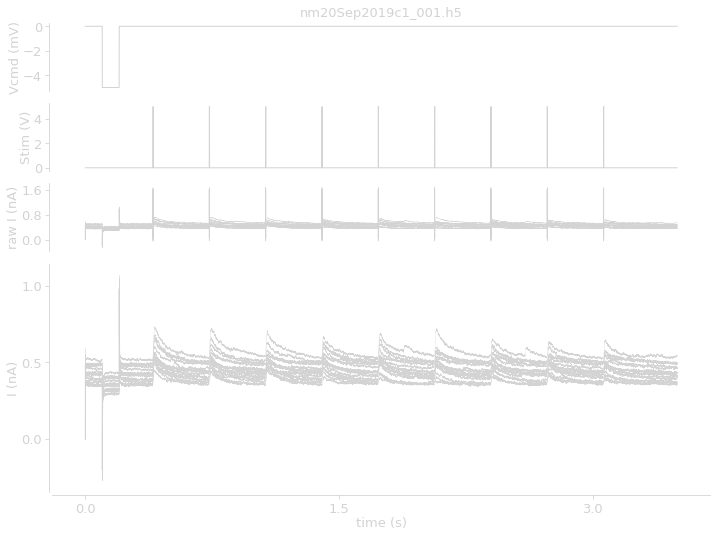

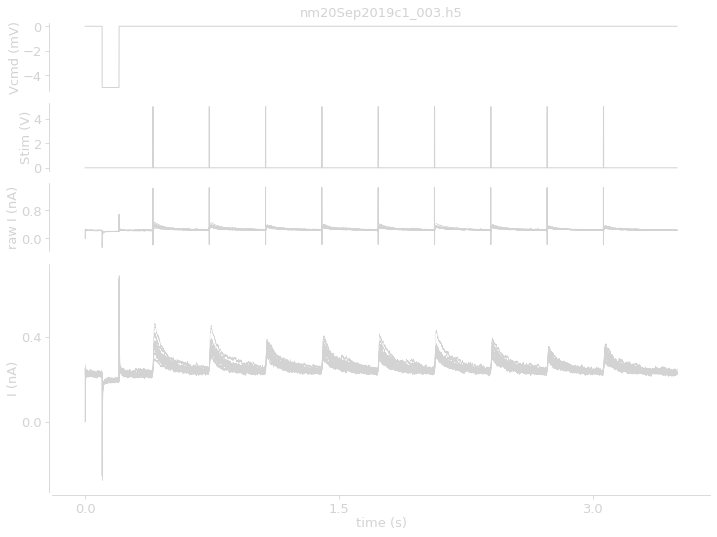

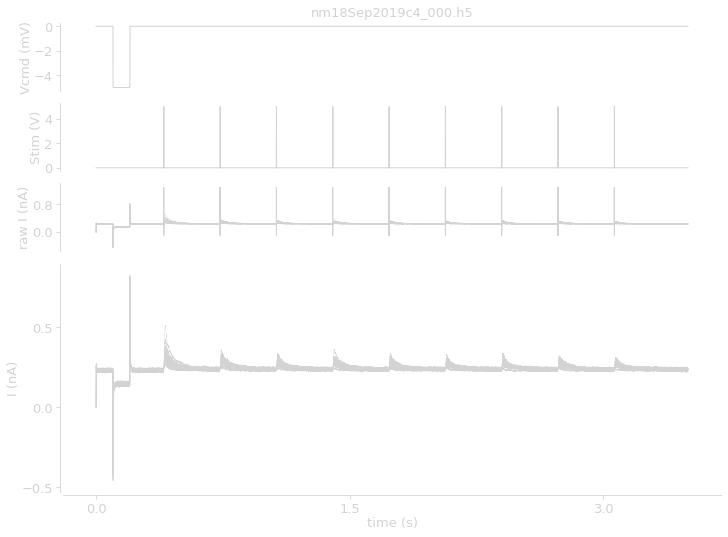

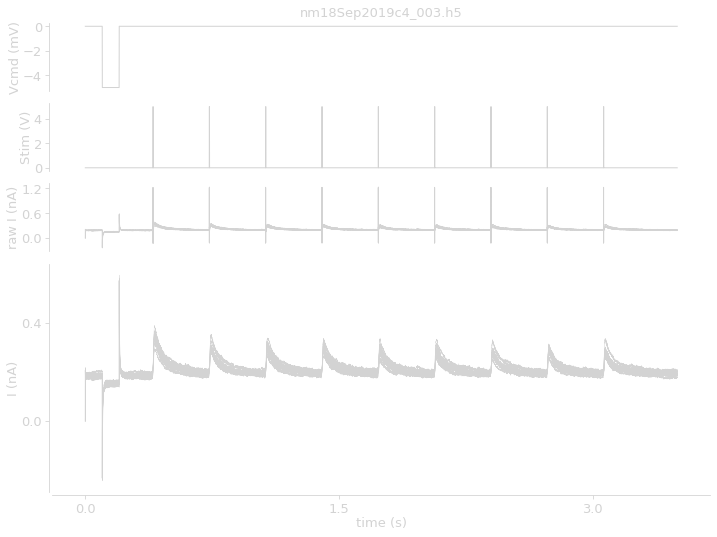

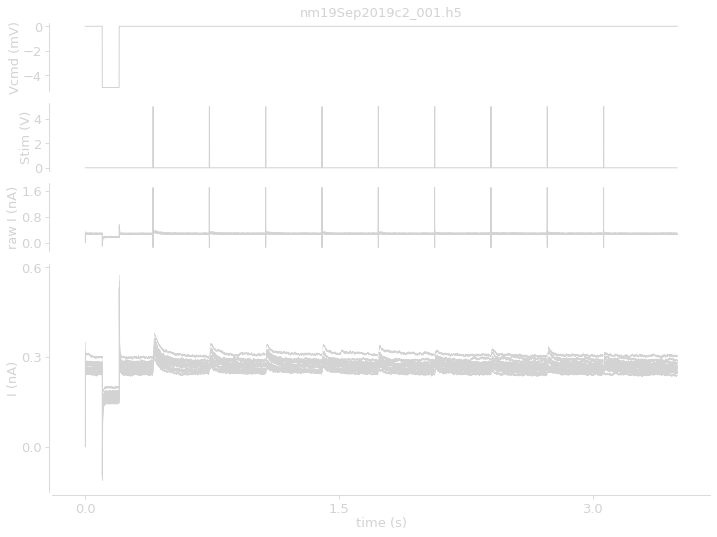

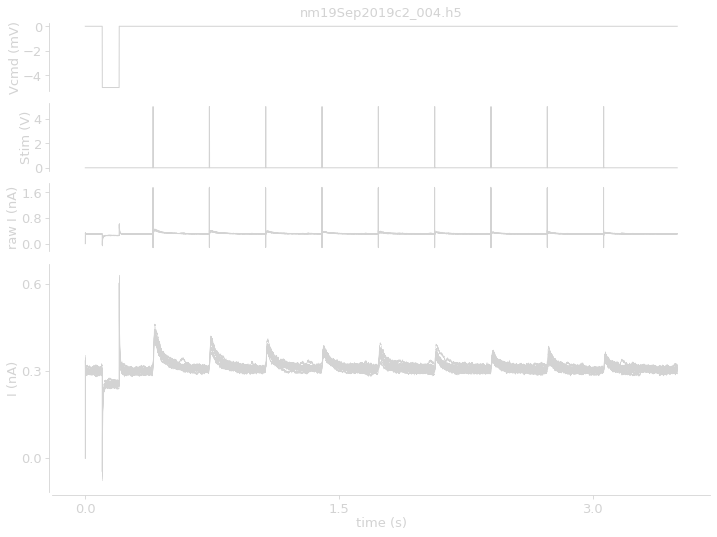

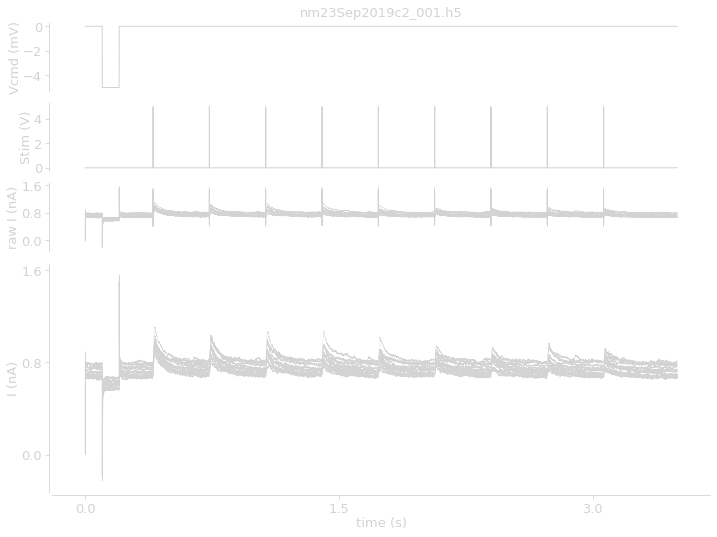

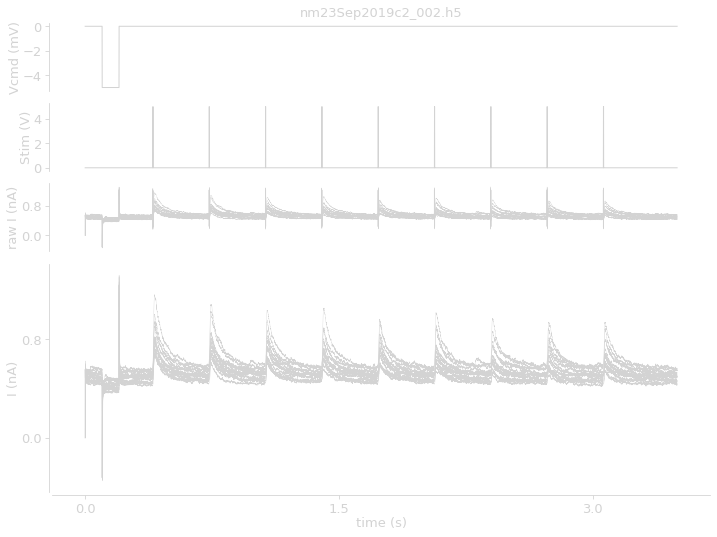

In [90]:
cond = '3Hz_protocol'
for i, cell in enumerate(VC_STEPS_DATASET[cond]):
    data_ctrl = LoadVCData(cond, iexp=i, condition='Control')
    plot_protocol(data_ctrl)
    data_test = LoadVCData(cond, iexp=i, condition='Tricine')
    plot_protocol(data_test)

In [343]:

    
def protocol_comparison(DATA,
                        labels=['Control', 'Tricine'],
                        colors=['k', ge.green],
                        window_for_peak=20, # ms
                        pre_window = 150, # ms
                        t0=400):
    fig, AX = ge.figure(axes=(1,3), figsize=(2,1.3), hspace=0.3)
    for data, c in zip(DATA, colors):
        AX[0].plot(1e-3*data['t'], data['recordings'][data['Irec_key']].mean(axis=0), color=c)
    ge.set_plot(AX[0], ['left'], ylabel='raw-I (nA)')

    for data, label, c in zip(DATA, labels, colors):
        tcond = (data['t']>t0-pre_window)
        baseline_cond = (data['t']>t0-pre_window) & (data['t']<t0)
        baseline = data['recordings']['Irecording_clean'].mean(axis=0)[baseline_cond].mean()
        trace = data['recordings']['Irecording_clean'].mean(axis=0)[tcond]-baseline
        
        peak_cond = (data['t'][tcond]>t0) & (data['t'][tcond]<t0+window_for_peak)
        norm_trace = compute_norm_trace(data, window_for_peak, pre_window, t0)
        
        AX[1].plot(1e-3*data['t'][tcond], trace, color=c, label=label)
        AX[2].plot(1e-3*data['t'][tcond], norm_trace, color=c, label=label)
        
    ge.set_plot(AX[1], ['left'], ylabel='I (nA)\n (-baseline&stim)')
    ge.set_plot(AX[2], xlabel='time (s)', ylabel='I (nA)\n (-baseline&stim)\n (+rescaled)')
    
    ge.legend(AX[1])
    return fig, AX


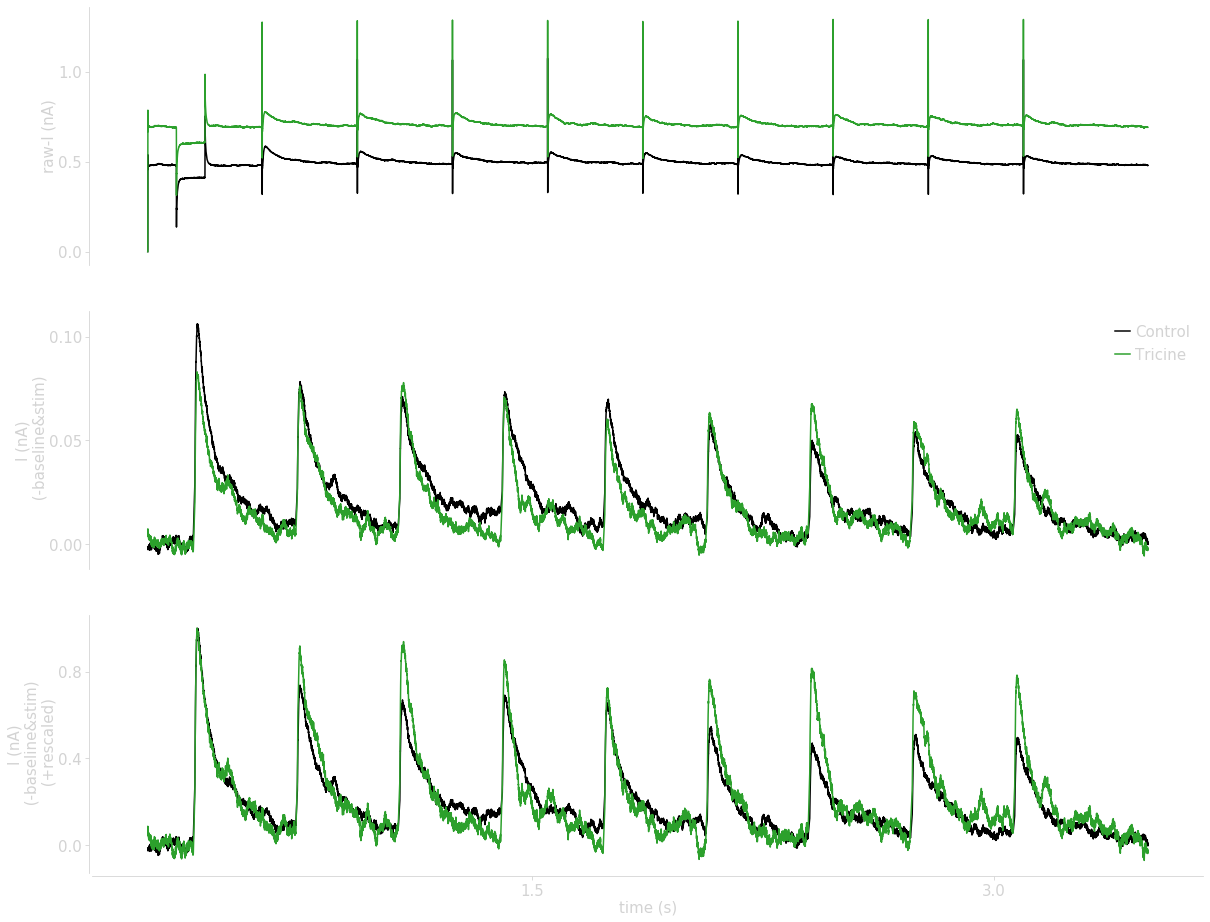

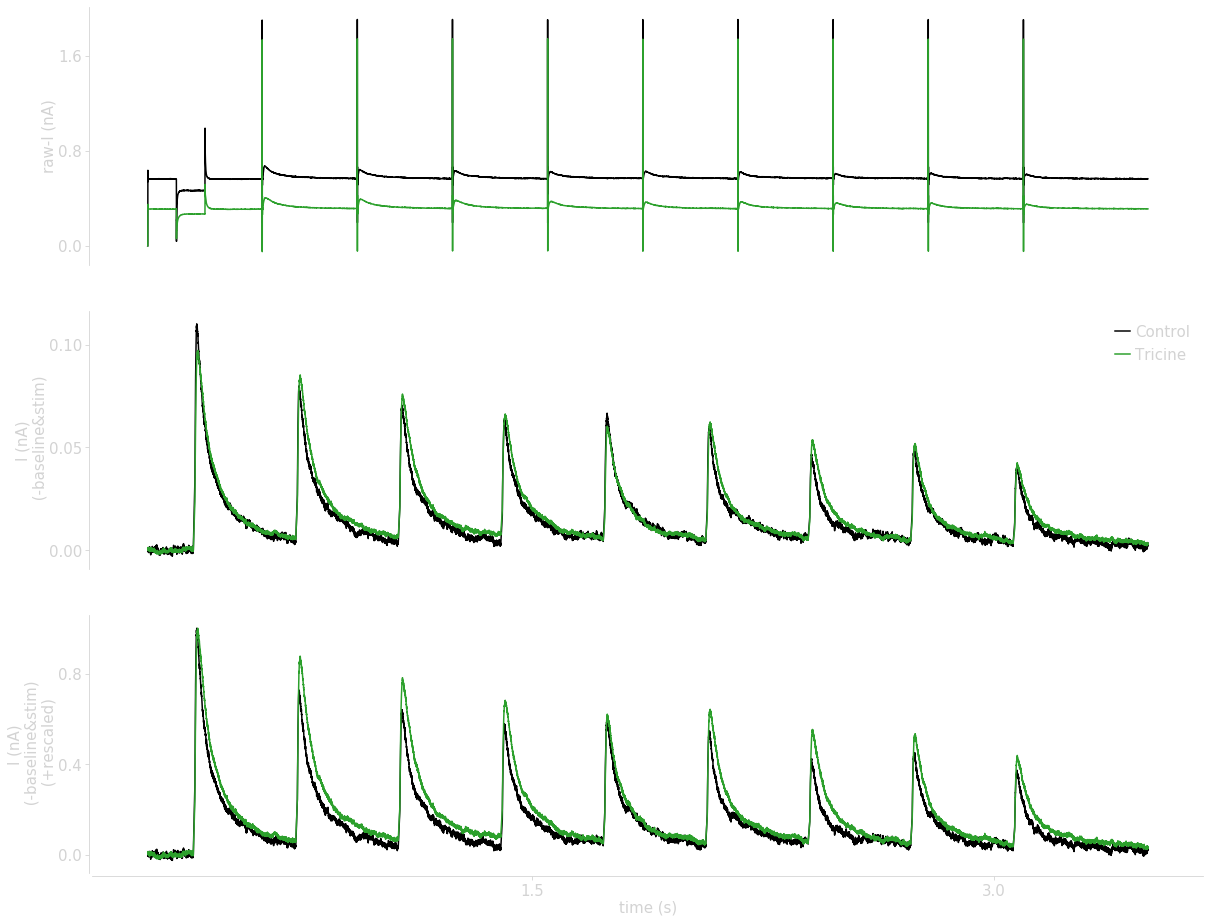

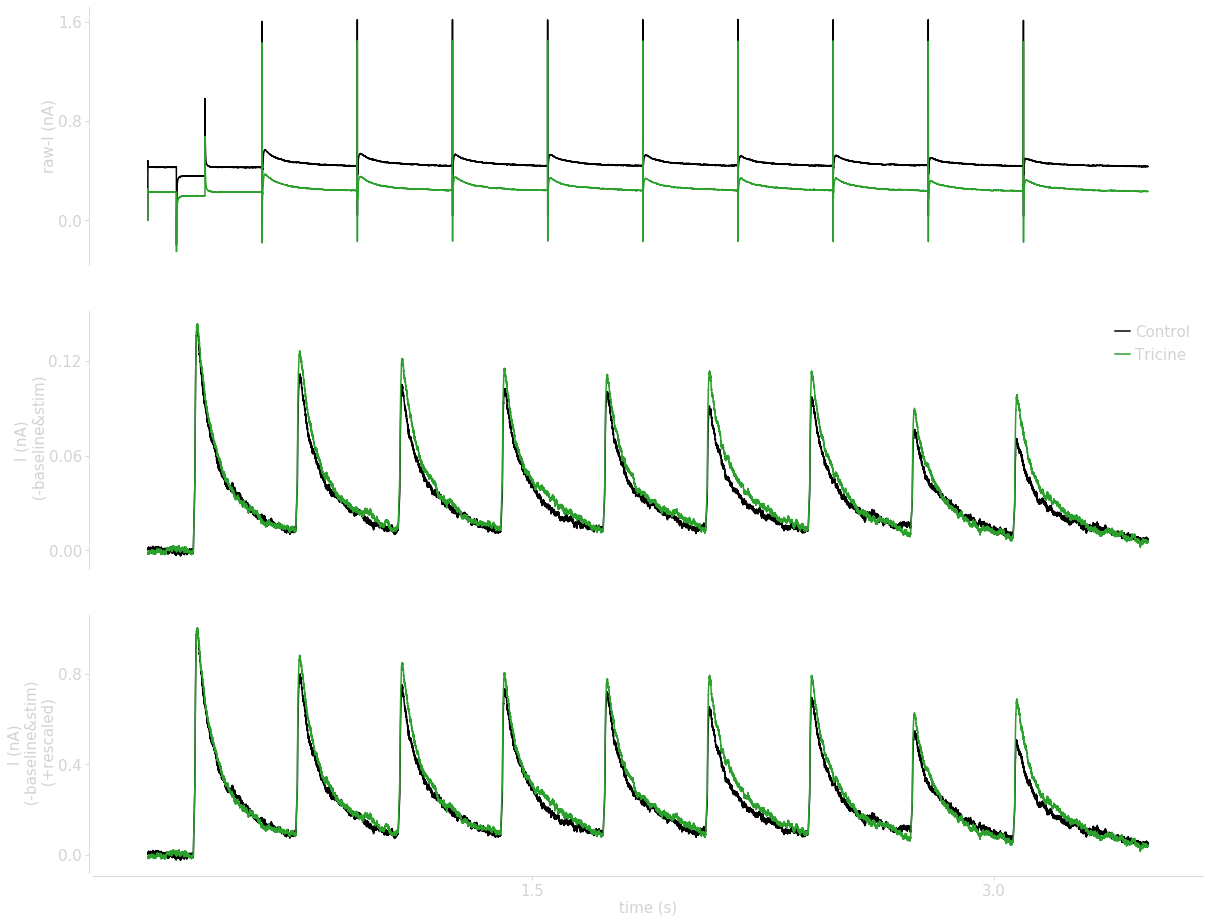

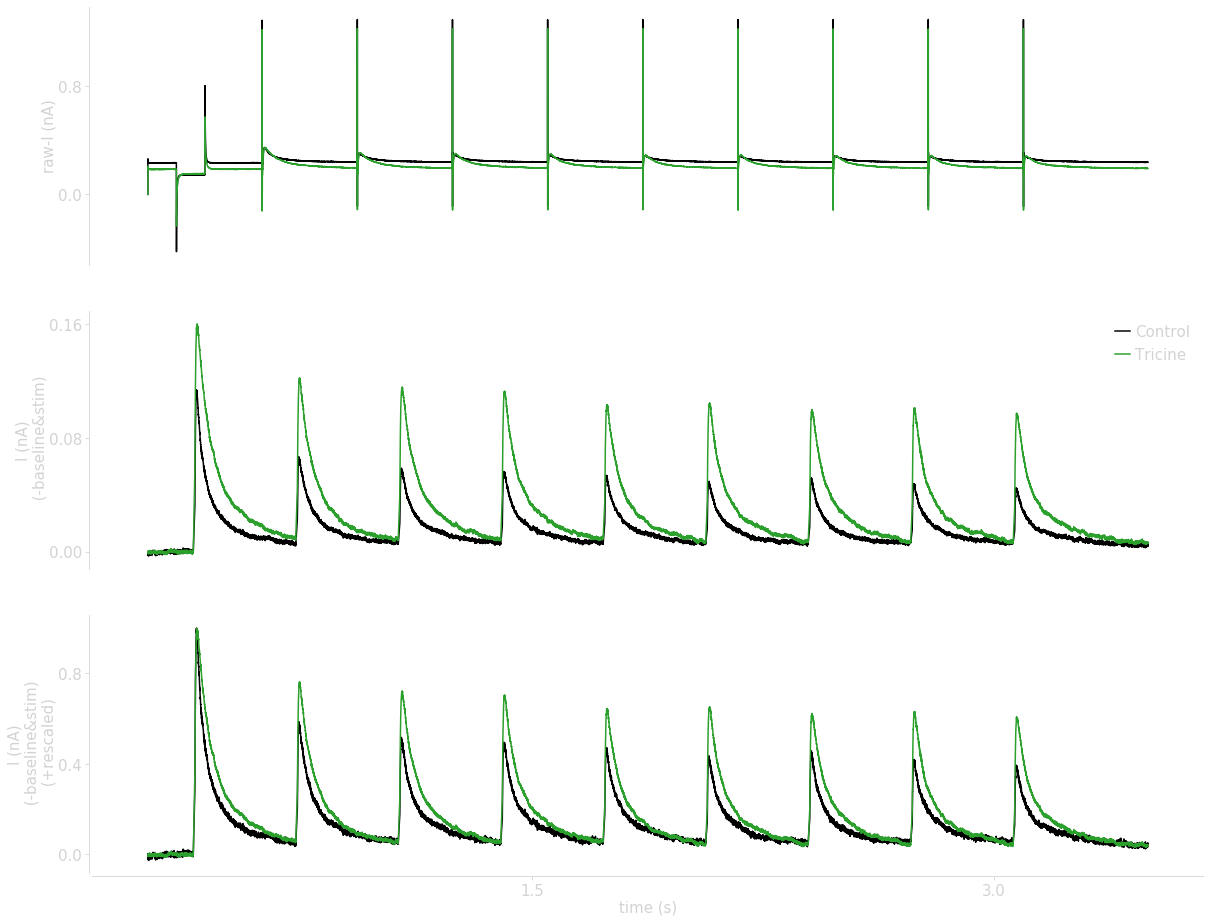

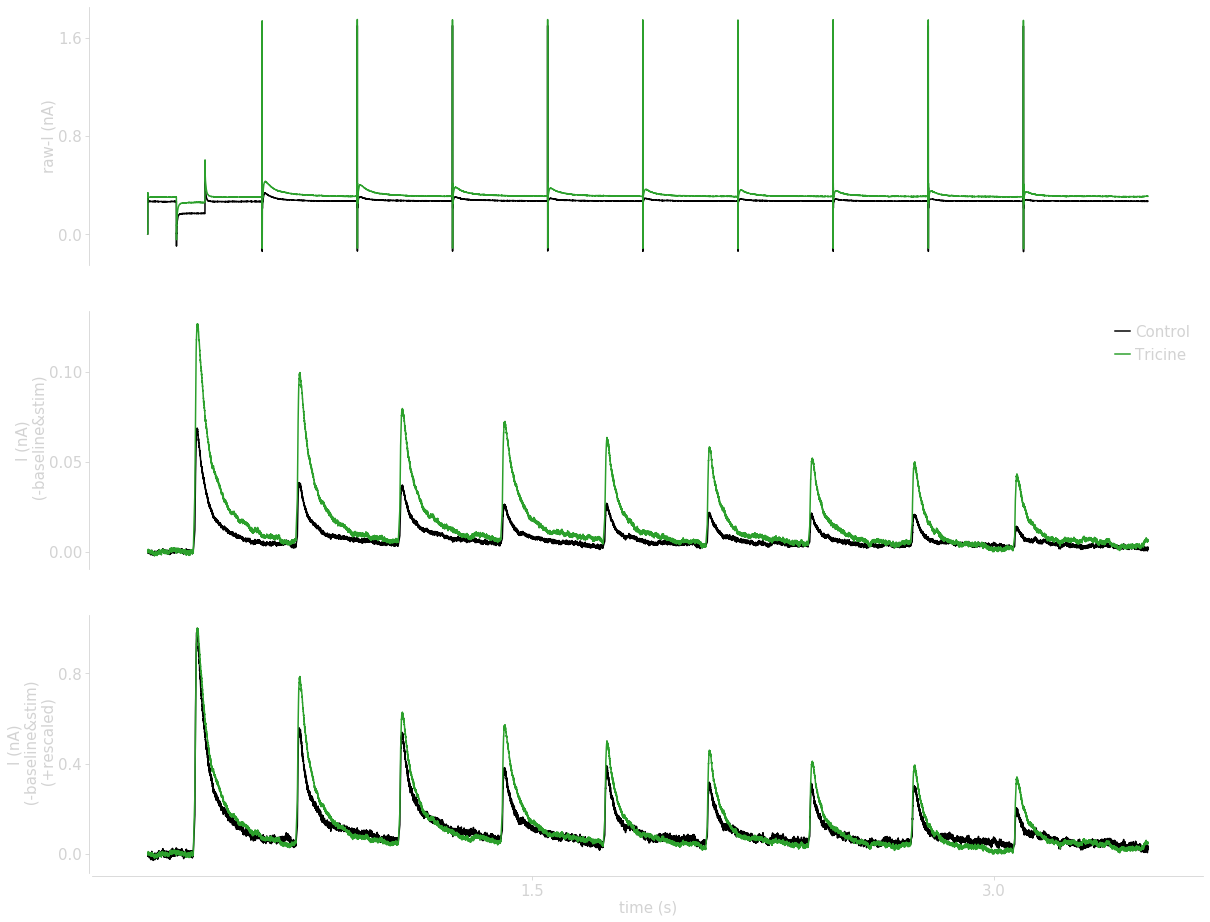

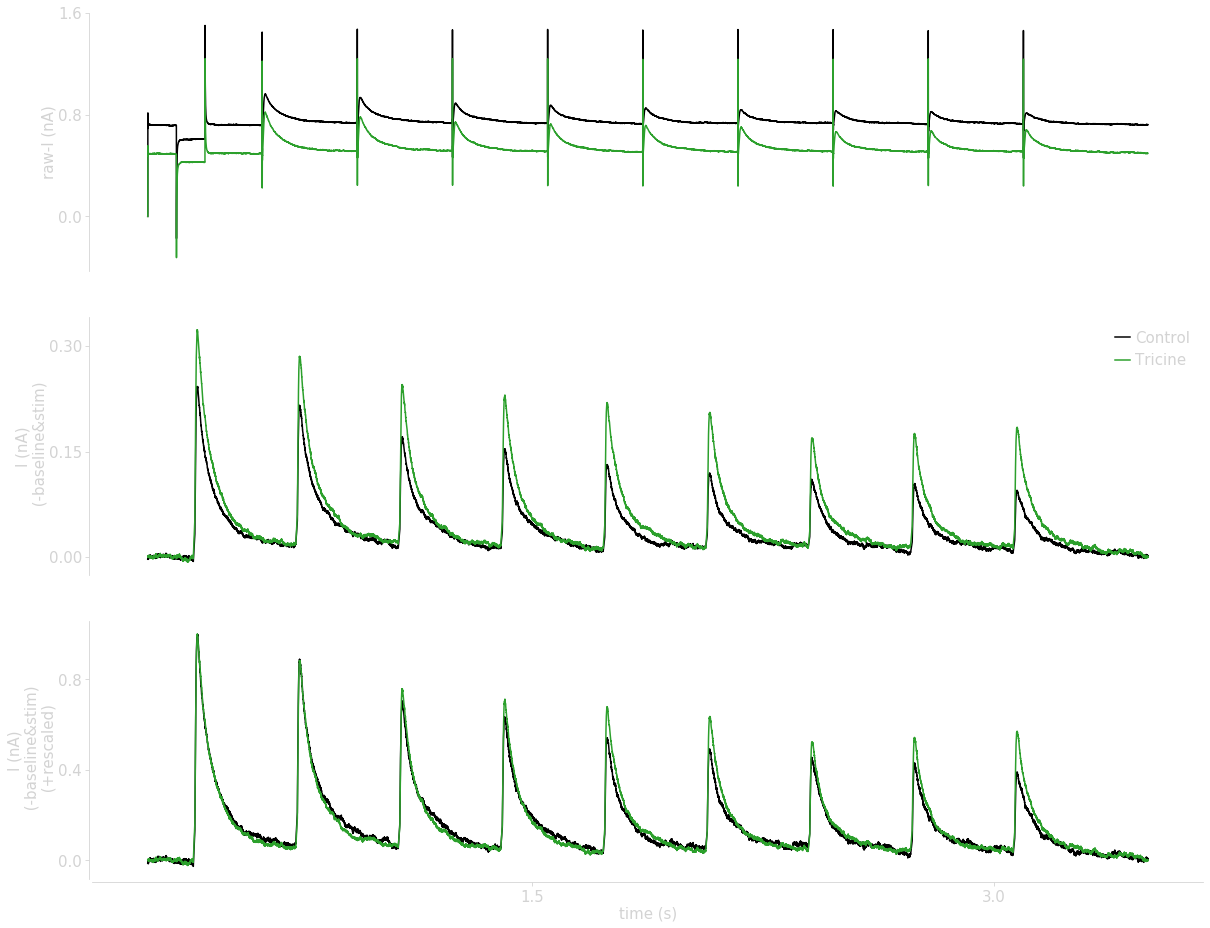

In [344]:
cond = '3Hz_protocol'
for i, cell in enumerate(VC_STEPS_DATASET[cond]):
    data_ctrl = LoadVCData(cond, iexp=i, condition='Control')
    data_test = LoadVCData(cond, iexp=i, condition='Tricine')
    protocol_comparison([data_ctrl, data_test])

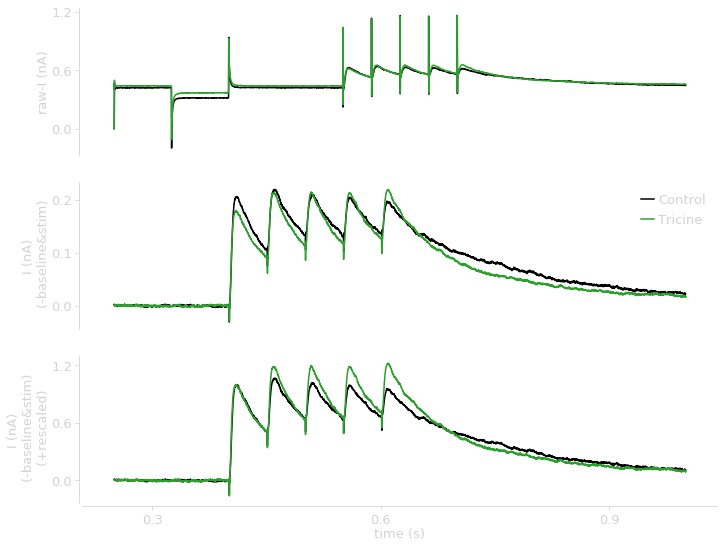

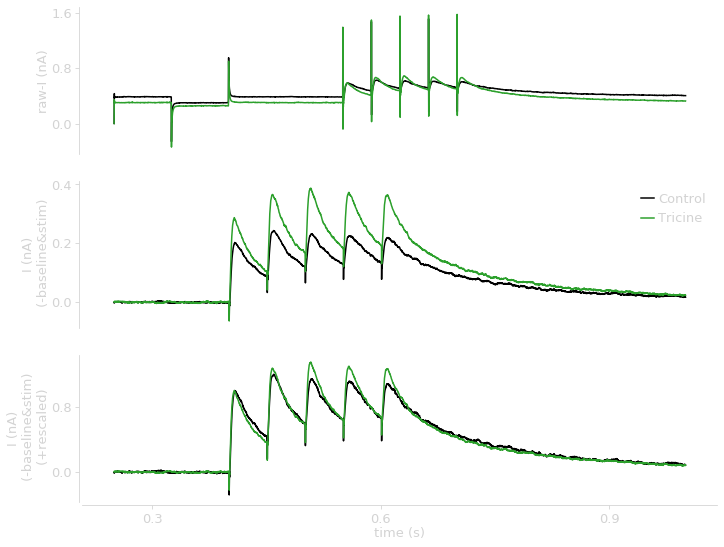

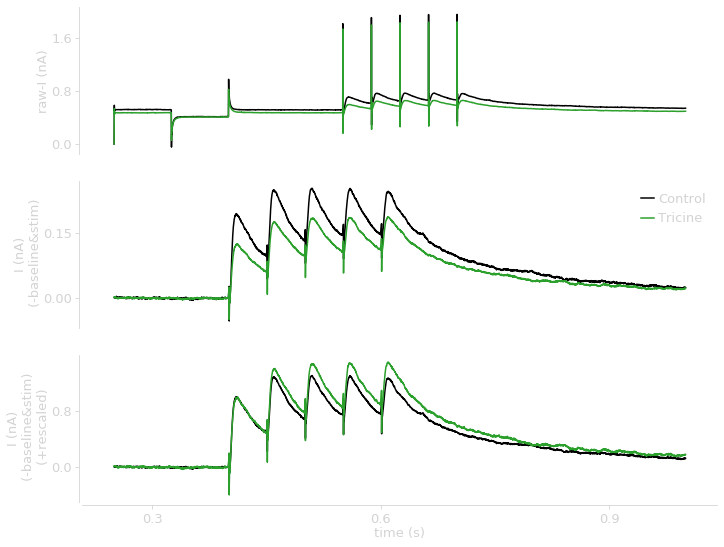

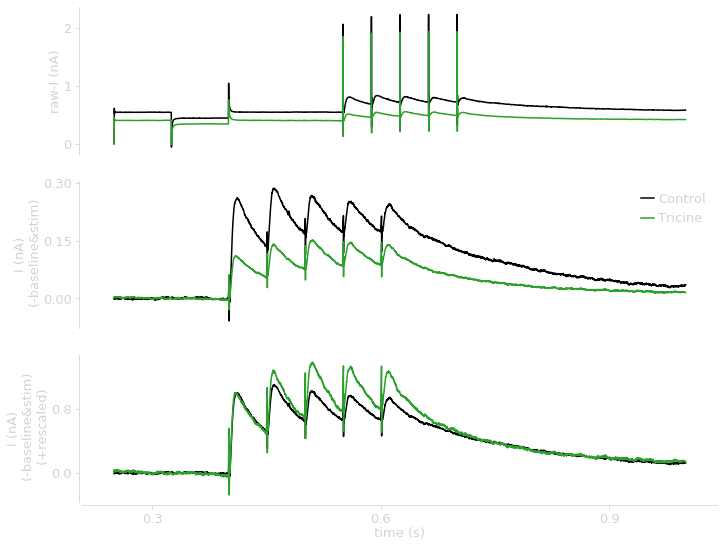

In [292]:
cond = '20Hz_protocol'
for i, cell in enumerate(VC_STEPS_DATASET[cond]):
    data_ctrl = LoadVCData(cond, iexp=i, condition='Control')
    data_test = LoadVCData(cond, iexp=i, condition='Tricine')
    protocol_comparison([data_ctrl, data_test])

## Minimization procedure

In [5]:
# toy model data

def build_stimulation():
    
    dt, tstop = 0.1, 5000.
    t = np.arange(int(tstop/dt))*dt
    model = {'t':t}
    events = np.empty(0)
    for cond, t0, freq_pulses, n_pulses in zip(['20Hz_protocol', '3Hz_protocol'],
                                               [500,1700], [20., 3.], [5, 9]) :

        new_events = t0+np.arange(n_pulses)*1e3/freq_pulses
        events = np.concatenate([events, new_events])
        model['%s_tstart' % cond] = t0
    model['events'] = events
    return model

model = build_stimulation()



In [2]:
from datavyz import gedn as ge

In [ ]:

calibration_constraints = {}
for cond, ax in zip(['20Hz_protocol', '3Hz_protocol'], AX):
    
    ## exp
    DT0 = FDATA[cond]['t'][FDATA[cond]['se'][0]]-FDATA[cond]['t'][0]
    DTfull = FDATA[cond]['t'][-1]-FDATA[cond]['t'][0]
    new_t = FDATA[cond]['t'][::10][:-1]-FDATA[cond]['t'][0]
    calibration_constraints['DT0_%s' % cond] = DT0
    calibration_constraints['DTfull_%s' % cond] = FDATA[cond]['t'][-1]-FDATA[cond]['t'][0]
    calibration_constraints['t_%s' % cond] = new_t

    # tricine cond
    te0 = FDATA[cond]['norm_trace_test'].mean(axis=0)*1e3*FDATA[cond]['scale_test'].mean()
    trace_exp = te0[::10][:-1] # subsampling at 1kHz
    calibration_constraints['Iexp_chelated_%s' % cond] = trace_exp
    
    # control cond
    te0 = FDATA[cond]['norm_trace_ctrl'].mean(axis=0)*1e3*FDATA[cond]['scale_ctrl'].mean()
    trace_exp = te0[::10][:-1] # subsampling at 1kHz
    calibration_constraints['Iexp_zinc_%s' % cond] = trace_exp
    
np.savez('data/exp_data_for_calibration.npz', **calibration_constraints)


## Perform calibration on Tricine case: chelated Zinc

In [53]:
import numpy as np
import itertools, os

In [87]:
sim.N

4096

### Find minimum

is performed in the script calibration_runs.py

### Calibration results: chelated-Zinc

## Perform calibration on control case: free-Zinc

### Run the different parameters

### Find minimum

In [20]:
from analyz.IO.npz import load_dict as npz_load
calib_data = npz_load('data/exp_data_for_calibration.npz')

sim = GridSimulation(os.path.join('data', 'calib', 'free-zinc-calib-grid.npz'))

def compute_residual(index):
    """
    here we don't keep the absolute 
    """

    try:
        mdata = load_dict(os.path.join('data', 'calib', sim.params_filename(index)+'.npz'))

        Residual = 1
        for cond in ['20Hz_protocol', '3Hz_protocol']:

            tcond = (mdata['t']>(mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond])) &\
                (mdata['t']<mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond]+\
                 calib_data['DTfull_%s' % cond])

            trace_model = -1e3*(mdata['Ic'][tcond]-mdata['Ic'][tcond][0])
            trace_exp = calib_data['Iexp_zinc_%s' % cond]
            new_t = calib_data['t_%s' % cond]

            # normalizing to peak
            first_peak_cond = (calib_data['t_%s' % cond]<calib_data['DT0_%s' % cond]+30)
            trace_model /= np.max(trace_model[first_peak_cond])
            trace_exp /= np.max(trace_exp[first_peak_cond])

            Residual *= 1+np.sum((trace_model-trace_exp)**2)/np.sum(trace_exp**2)

    except FileNotFoundError:
        print(os.path.join('data', 'calib', sim.params_filename(index)+'.npz'), 'not found')
        Residual = 1e10
    
    return Residual

Residuals = np.ones(int(sim.N))*np.inf
for i in range(int(sim.N)):
    Residuals[i] = compute_residual(i)

ibest = np.argmin(Residuals)
print(Residuals[ibest])
from model import Model
best_free_config = {'filename':os.path.join('data', 'calib', sim.params_filename(ibest)+'.npz')}
sim.update_dict_from_GRID_and_index(ibest, best_free_config) # update Model parameters
np.savez('data/best_free_config.npz', **best_free_config)    
print(best_free_config)

data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_20.000000--Deltax0_0.300000.npz not found
data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_20.000000--Deltax0_0.366667.npz not found
data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_20.000000--Deltax0_0.433333.npz not found
data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_20.000000--Deltax0_0.500000.npz not found
data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_20.000000--Deltax0_0.566667.npz not found
data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_20.000000--Deltax0_0.633333.npz not found
data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_20.000000--Deltax0_0.700000.npz not found
data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_34.199519--Deltax0_0.300000.npz not found
data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_34.199519--Deltax0_0.366667.npz not found
data/calib/alphaZn_0.300000--tauRiseZn_1.000000--tauDecayZn_34.199519--Deltax0_0.4

data/calib/alphaZn_0.366667--tauRiseZn_1.849311--tauDecayZn_500.000000--Deltax0_0.366667.npz not found
data/calib/alphaZn_0.366667--tauRiseZn_1.849311--tauDecayZn_500.000000--Deltax0_0.433333.npz not found
data/calib/alphaZn_0.366667--tauRiseZn_1.849311--tauDecayZn_500.000000--Deltax0_0.500000.npz not found
data/calib/alphaZn_0.366667--tauRiseZn_1.849311--tauDecayZn_500.000000--Deltax0_0.566667.npz not found
data/calib/alphaZn_0.366667--tauRiseZn_1.849311--tauDecayZn_500.000000--Deltax0_0.633333.npz not found
data/calib/alphaZn_0.366667--tauRiseZn_1.849311--tauDecayZn_500.000000--Deltax0_0.700000.npz not found
data/calib/alphaZn_0.366667--tauRiseZn_3.419952--tauDecayZn_20.000000--Deltax0_0.300000.npz not found
data/calib/alphaZn_0.366667--tauRiseZn_3.419952--tauDecayZn_20.000000--Deltax0_0.366667.npz not found
data/calib/alphaZn_0.366667--tauRiseZn_3.419952--tauDecayZn_20.000000--Deltax0_0.433333.npz not found
data/calib/alphaZn_0.366667--tauRiseZn_3.419952--tauDecayZn_20.000000--Delta

data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_100.000000--Deltax0_0.300000.npz not found
data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_100.000000--Deltax0_0.366667.npz not found
data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_100.000000--Deltax0_0.433333.npz not found
data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_100.000000--Deltax0_0.500000.npz not found
data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_100.000000--Deltax0_0.566667.npz not found
data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_100.000000--Deltax0_0.633333.npz not found
data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_100.000000--Deltax0_0.700000.npz not found
data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_170.997595--Deltax0_0.300000.npz not found
data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_170.997595--Deltax0_0.366667.npz not found
data/calib/alphaZn_0.433333--tauRiseZn_40.000000--tauDecayZn_170

data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_20.000000--Deltax0_0.433333.npz not found
data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_20.000000--Deltax0_0.500000.npz not found
data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_20.000000--Deltax0_0.566667.npz not found
data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_20.000000--Deltax0_0.633333.npz not found
data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_20.000000--Deltax0_0.700000.npz not found
data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_34.199519--Deltax0_0.300000.npz not found
data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_34.199519--Deltax0_0.366667.npz not found
data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_34.199519--Deltax0_0.433333.npz not found
data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_34.199519--Deltax0_0.500000.npz not found
data/calib/alphaZn_0.566667--tauRiseZn_3.419952--tauDecayZn_34.199519--Deltax0_0.5

data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_100.000000--Deltax0_0.500000.npz not found
data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_100.000000--Deltax0_0.566667.npz not found
data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_100.000000--Deltax0_0.633333.npz not found
data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_100.000000--Deltax0_0.700000.npz not found
data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_170.997595--Deltax0_0.300000.npz not found
data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_170.997595--Deltax0_0.366667.npz not found
data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_170.997595--Deltax0_0.433333.npz not found
data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_170.997595--Deltax0_0.500000.npz not found
data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_170.997595--Deltax0_0.566667.npz not found
data/calib/alphaZn_0.633333--tauRiseZn_6.324555--tauDecayZn_170.997595--D

data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_100.000000--Deltax0_0.566667.npz not found
data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_100.000000--Deltax0_0.633333.npz not found
data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_100.000000--Deltax0_0.700000.npz not found
data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_170.997595--Deltax0_0.300000.npz not found
data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_170.997595--Deltax0_0.366667.npz not found
data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_170.997595--Deltax0_0.433333.npz not found
data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_170.997595--Deltax0_0.500000.npz not found
data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_170.997595--Deltax0_0.566667.npz not found
data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_170.997595--Deltax0_0.633333.npz not found
data/calib/alphaZn_0.700000--tauRiseZn_11.696071--tauDecayZn_170

# Minimization output

In [71]:
from datavyz import gedn as ge
from analyz.IO.npz import load_dict

In [22]:
output = load_dict(load_dict('data/passive-props-cesium.npz')['filename'])
fig, ax, Rm, Cm = perform_ICcharact(1e-3*output['t'], 1e-3*output['Vm_soma'],
                                    t0=50e-3, t1=150e-3, with_plot=True, ge=ge)


KeyError: 'filename'

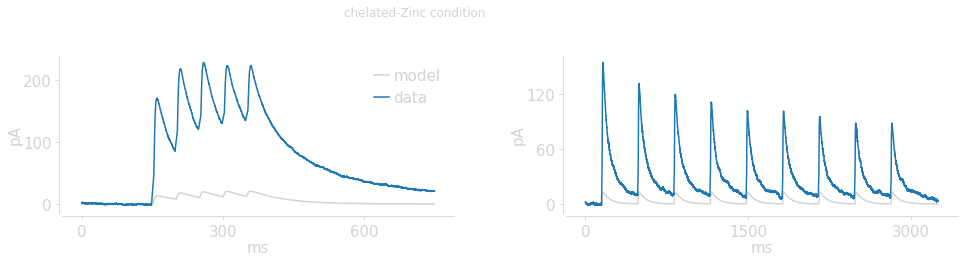

In [82]:
fig, AX = ge.figure(axes=(2,1), figsize=(1.2,0.8),
                    wspace=0.5, hspace=0)

calib_data = load_dict('data/exp_data_for_calibration.npz')
mdata = load_dict(load_dict('data/best_chelated_config.npz')['filename'])

for cond, ax in zip(['20Hz_protocol', '3Hz_protocol'], AX):
    ## data
    tcond = (mdata['t']>(mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond])) &\
        (mdata['t']<mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond]+\
         calib_data['DTfull_%s' % cond])
    
    trace_model = -1e3*(mdata['Ic'][tcond]-mdata['Ic'][tcond][0])
    trace_exp = calib_data['Iexp_chelatedZn_%s' % cond]
    
    ax.plot(calib_data['t_%s' % cond], trace_model, color=ge.default_color, label='model')
    ax.plot(calib_data['t_%s' % cond], trace_exp, color=ge.blue, label='data')

    ge.set_plot(ax, ylabel='pA', xlabel='ms')
ge.legend(AX[0])
fig.suptitle('chelated-Zinc condition', color=ge.default_color);

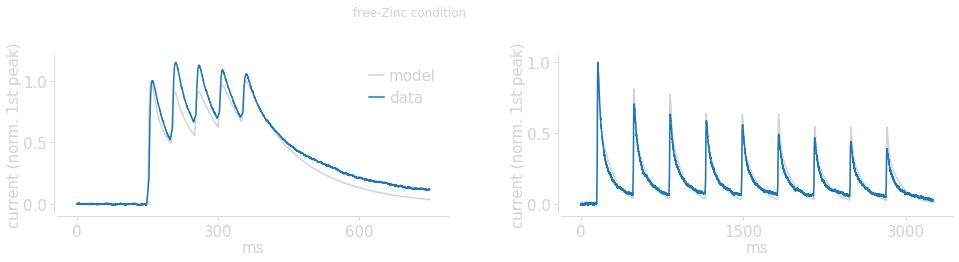

In [28]:
from analyz.IO.npz import load_dict
from datavyz import gedn as ge
import numpy as np

fig, AX = ge.figure(axes=(2,1), figsize=(1.2,0.8),
                    wspace=0.5, hspace=0)

calib_data = load_dict('data/exp_data_for_calibration.npz')
mdata = load_dict(load_dict('data/best_free_zinc_config.npz')['filename'])

for cond, ax in zip(['20Hz_protocol', '3Hz_protocol'], AX):
    ## data
    tcond = (mdata['t']>(mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond])) &\
        (mdata['t']<mdata['%s_tstart' % cond]-calib_data['DT0_%s' % cond]+\
         calib_data['DTfull_%s' % cond])
    
    trace_model = -1e3*(mdata['Ic'][tcond]-mdata['Ic'][tcond][0])
    trace_exp = calib_data['Iexp_freeZn_%s' % cond]

    # normalizing to peak
    first_peak_cond = (calib_data['t_%s' % cond]<calib_data['DT0_%s' % cond]+30)
    norm_model = 1./np.max(trace_model[first_peak_cond])
    norm_exp = 1./np.max(trace_exp[first_peak_cond])
    
    # ax.plot(calib_data['t_%s' % cond], trace_model, color=ge.default_color, label='model')
    ax.plot(calib_data['t_%s' % cond], norm_model*trace_model, color=ge.default_color, label='model')
    ax.plot(calib_data['t_%s' % cond], norm_exp*trace_exp, color=ge.blue, label='data')

    ge.set_plot(ax, ylabel='current (norm. 1st peak)', xlabel='ms', yticks=np.linspace(0,1,3))
ge.legend(AX[0])

fig.suptitle('free-Zinc condition', color=ge.default_color);

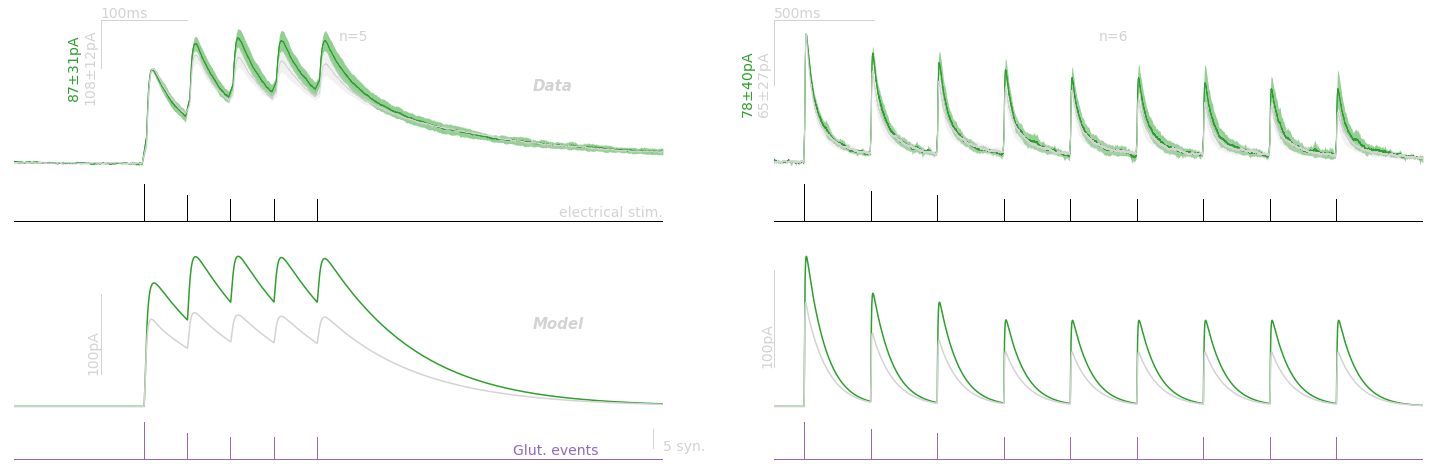

In [72]:
from analyz.IO.npz import load_dict

MDATA = {'free':load_dict(load_dict('data/best_freeZn_config.npz')['filename']),
         'chelated':load_dict(load_dict('data/best_chelatedZn_config.npz')['filename'])}
FDATA = load_dict('data/full_data_for_calibration.npz')

fig, AX = ge.figure(axes_extents=[[[1,7],[1,7]],
                                  [[1,2],[1,2]],
                                  [[1,1],[1,1]],
                                  [[1,7],[1,7]],
                                  [[1,2],[1,2]]],
                    figsize=(1.55,0.12),
                    wspace=0.3, hspace=0, right=0.)

for ax in AX[2]:
    ax.axis('off')
    
for cond, ax, ax1, ax2, ax3, I0, t0, DI, T in zip(['20Hz_protocol', '3Hz_protocol'],
                                                  AX[0], AX[1], AX[3], AX[4], [1.5, 1.1],
                                        [100, 0], [0.5, 0.5], [100, 500]):

    ## exp
    ax.plot(FDATA[cond]['t'][0]+t0+np.zeros(2), [I0,I0-DI], lw=1, color=ge.default_color)
    ax.plot(FDATA[cond]['t'][0]+t0+np.arange(2)*T, [I0, I0], lw=1, color=ge.default_color)
    ge.annotate(ax, '%.0f$\pm$%.0fpA' % (1e3*FDATA[cond]['scale_freeZn'].mean()*DI,
                1e3*FDATA[cond]['scale_freeZn'].std()*DI),
                (FDATA[cond]['t'][0]+t0, I0-DI), xycoords='data', rotation=90,
                ha='right', va='center', size='small')
    ge.annotate(ax, '%.0f$\pm$%.0fpA\n' % (1e3*FDATA[cond]['scale_chelatedZn'].mean()*DI,
                1e3*FDATA[cond]['scale_chelatedZn'].std()*DI),
                (FDATA[cond]['t'][0]+t0, I0-DI), xycoords='data', rotation=90,
                ha='right', color=ge.green, va='center', size='small')
    ge.plot(FDATA[cond]['t'], FDATA[cond]['norm_trace_chelatedZn'].mean(axis=0),
            sy=FDATA[cond]['norm_trace_chelatedZn'].std(axis=0), ax=ax, color=ge.green)
    ge.plot(FDATA[cond]['t'], FDATA[cond]['norm_trace_chelatedZn'].mean(axis=0),
            sy=FDATA[cond]['norm_trace_chelatedZn'].std(axis=0), ax=ax, color=ge.green)
    ge.plot(FDATA[cond]['t'], FDATA[cond]['norm_trace_freeZn'].mean(axis=0),
            sy=FDATA[cond]['norm_trace_freeZn'].std(axis=0), ax=ax)
    ge.annotate(ax, 'n=%i' % len(FDATA[cond]['norm_trace_freeZn']), (.5,.8), size='small')
    ge.annotate(ax, '%ims' % T, (FDATA[cond]['t'][0]+t0, I0), xycoords='data', size='small')
    ge.set_plot(ax,[], xlim=[FDATA[cond]['t'][0], FDATA[cond]['t'][-1]])


    ## model
    DT0 = FDATA[cond]['t'][FDATA[cond]['se'][0]]-FDATA[cond]['t'][0]
    DTfull = FDATA[cond]['t'][-1]-FDATA[cond]['t'][0]

    YSCALE = 100
    tcond = (MDATA['free']['t']>(MDATA['free']['%s_tstart' % cond]-DT0)) &\
        (MDATA['free']['t']<(MDATA['free']['%s_tstart' % cond]-DT0+DTfull))
    for output, c in zip([MDATA['chelated'], MDATA['free']], [ge.green, ge.default_color]):
        trace = -(output['Ic'][tcond]-output['Ic'][tcond][0])
        tt = output['t'][tcond]
        ax2.plot(tt, 1e3*trace, color=c)
        
    ax2.plot(output['t'][tcond][0]+t0+np.zeros(2), [.4*YSCALE, 1.4*YSCALE], lw=1, color=ge.default_color)
    ge.annotate(ax2, '%ipA' % YSCALE, (output['t'][tcond][0]+t0, .4*YSCALE), xycoords='data', rotation=90, ha='right', va='bottom', size='small')

        
    ge.set_plot(ax2,[], xlim=[output['t'][tcond][0], output['t'][tcond][-1]])

    
    x, y = [output['t'][tcond][0]], [0]
    for e, n in zip(output['events'], output['Npicked']):
        x += [e,e,e]
        y += [0,n,0]
    x += [output['t'][tcond][-1]]
    y += [0]
    x, y = np.array(x), np.array(y)
    tcond = (x>=output['t'][tcond][0]) & (x<=output['t'][tcond][-1])
    ax1.plot(x[tcond], y[tcond], 'k-', lw=1)
    ax3.plot(x[tcond], y[tcond], lw=1, color=ge.purple)
    ge.set_plot(ax1,[], xlim=[x[tcond][0],x[tcond][-1]], ylim=[-1,np.max(output['Npicked'])+2])
    ge.set_plot(ax3,[], xlim=[x[tcond][0],x[tcond][-1]], ylim=[-1,np.max(output['Npicked'])+2])

ge.plot(AX[4][0].get_xlim()[1]*.99*np.ones(2), [3,8], ax=AX[4][0], no_set=True)
ge.annotate(AX[4][0], '5 syn.', (1.,0.2), size='small')
    
ge.annotate(AX[0][0], 'Data', (.8,.5), italic=True, bold=True)
ge.annotate(AX[3][0], 'Model', (.8,.5), italic=True, bold=True)
ge.annotate(AX[1][0], 'electrical stim.', (1.,.1), ha='right', size='small')
ge.annotate(AX[4][0], 'Glut. events', (.9,.1), ha='right', size='small', color=ge.purple)
#fig.savefig('figures/calibration.svg')    